In [1]:
import numpy as np
import numpy_financial as npf
import pandas as pd
import pylab as pl
from random import gauss, uniform, randint
from math import exp, sqrt, log, ceil, floor
#import math
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import norm
import seaborn as sns
import random
import pyflux as pf

plt.rcParams['figure.figsize'] = [12, 6]

In [536]:
alpha = 0.9095
a = 0.71
b = 2
Y = 10

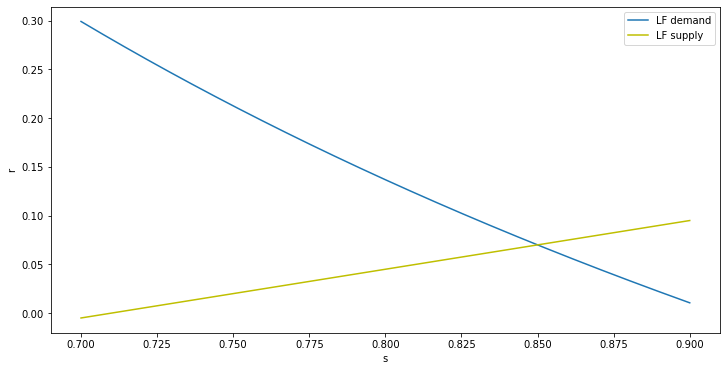

In [537]:
plt.plot(np.linspace(0.7,0.9,1000), alpha / np.linspace(0.7,0.9,1000) - 1, label = 'LF demand')
plt.plot(np.linspace(0.7,0.9,1000), 1 / b * np.linspace(0.7,0.9,1000) - a / b, 'y', label = 'LF supply')
plt.xlabel('s')
plt.ylabel('r')
plt.legend()
plt.show()

In [539]:
r_1 = 0.07
r_2 = 0.01
#r_3 = 0.07

In [540]:
s_1 = alpha / (1 + r_1)
s_2 = alpha / (1 + r_2)
#s_3 = alpha / (1 + r_3)
s_3 = a + b * r_2 

In [541]:
r_3 = alpha / s_3 - 1

In [542]:
dM = Y * (s_2 - s_3)

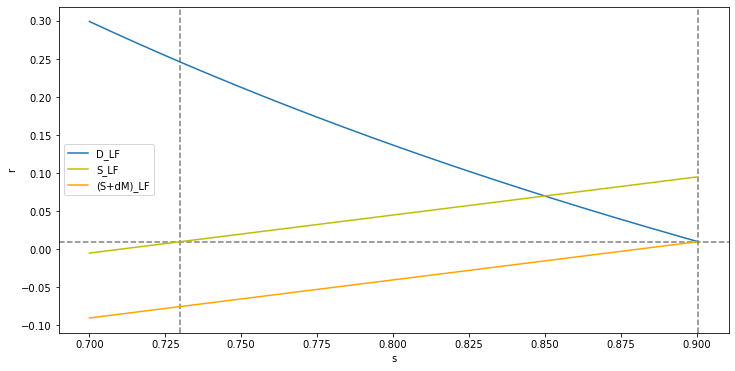

In [543]:
#plt.axhline(y = r_1, color = 'gray', linestyle = 'dashed')
plt.axhline(y = r_2, color = 'gray', linestyle = 'dashed')
plt.axvline(x = s_3, color = 'gray', linestyle = 'dashed')
plt.axvline(x = s_2, color = 'gray', linestyle = 'dashed')
plt.plot(np.linspace(0.7,0.9,1000), alpha / np.linspace(0.7,0.9,1000) - 1, label = 'D_LF')
plt.plot(np.linspace(0.7,0.9,1000), 1 / b * np.linspace(0.7,0.9,1000) - a / b, 'y', label = 'S_LF')
plt.plot(np.linspace(0.7,0.9,1000), 1 / b * (np.linspace(0.7,0.9,1000) - dM / Y) - a / b, 'orange', label = '(S+dM)_LF')
plt.xlabel('s')
plt.ylabel('r')
plt.legend()
plt.show()

In [544]:
C_1 = (1 - s_1) * Y
I_1 = s_1 * Y
W_1 = Y * (1 - s_1 - r_1 / (1 + r_1))

p = I_1 / (W_1 * (1 / r_1 ** 2 + 1 / r_1)) + r_1
T_1 = ((-p * sp.special.lambertw(-exp(-r_1 / p) * r_1 / p , k = -1) - r_1) / (p * r_1)).real

In [545]:
C_2 = (1 - s_2) * Y
I_2 = s_2 * Y
W_2 = Y * (1 - s_2 - r_2 / (1 + r_2))

p = I_2 / (W_2 * (1 / r_2 ** 2 + 1 / r_2)) + r_2
T_2 = ((-p * sp.special.lambertw(-exp(-r_2 / p) * r_2 / p , k = -1) - r_2) / (p * r_2)).real

In [546]:
C_3 = (1 - s_3) * Y
I_3 = s_3 * Y
W_3 = Y * (1 - s_3 - r_2 / (1 + r_2))

p = I_3 / (W_3 * (1 / r_2 ** 2 + 1 / r_2)) + r_2
T_3 = ((-p * sp.special.lambertw(-exp(-r_2 / p) * r_2 / p , k = -1) - r_2) / (p * r_2)).real

In [547]:
dt = 0.01

In [548]:
E_1 = np.zeros(2000)
E_1[1900:2000] = C_1
for i in range(int(2000 - (T_1 + 1) * 100), 1900):
    E_1[i + 1] = E_1[i] + (W_1 / T_1 + r_1 * (W_1 / T_1 + E_1[i])) * dt

In [549]:
E_2 = np.zeros(2000)
E_2[1900:2000] = C_2
for i in range(int(2000 - (T_2 + 1) * 100), 1900):
    E_2[i + 1] = E_2[i] + (W_2 / T_2 + r_2 * (W_2 / T_2 + E_2[i])) * dt

In [550]:
E_3 = np.zeros(2000)
E_3[1900:2000] = C_3
for i in range(int(2000 - (T_3 + 1) * 100), 1900):
    E_3[i + 1] = E_3[i] + (W_3 / T_3 + r_2 * (W_3 / T_3 + E_3[i])) * dt

In [551]:
E_T = np.array([E_2[i] if E_2[i] >= E_3[i] else E_3[i] for i in range(2000)]) * (Y+dM) / (sum([E_2[i] if E_2[i] >= E_3[i] else E_3[i] for i in range(2000)]) / 100)

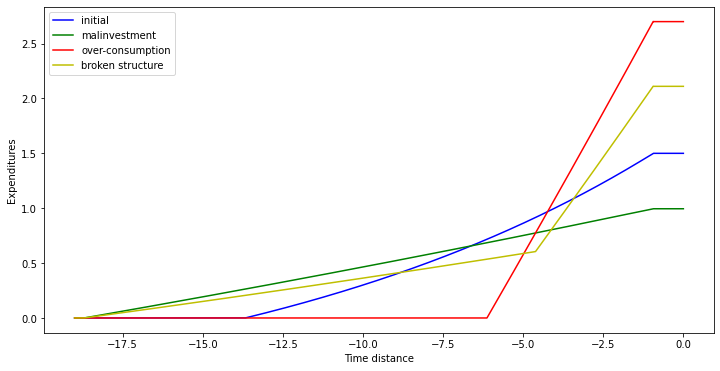

In [552]:
plt.plot(np.linspace(1, 20, 2000) - 20, E_1, color = 'b', label = 'initial')
plt.plot(np.linspace(1, 20, 2000) - 20, E_2, color = 'g', label = 'malinvestment')
plt.plot(np.linspace(1, 20, 2000) - 20, E_3, color = 'r', label = 'over-consumption')
plt.plot(np.linspace(1, 20, 2000) - 20, E_T, color = 'y', label = 'broken structure')
plt.xlabel('Time distance')
plt.ylabel('Expenditures')
plt.legend()
plt.show()

In [553]:
E = np.zeros((4000, 2000))
E[0,:] = E_1

In [554]:
dt = 0.01
k_1 = 0.07
Y_t = Y
dM_t = dM
kappa = 0.03
Y_dM_t = Y + dM
E_d_t = E_T
for t in range(3999):
    E[t+1,:] = E[t,:] + k_1 * (E_d_t - E[t,:]) * dt 
    Y_t = Y_t + kappa * dM_t * dt
    dM_t = dM_t + (s_2 - s_3) * kappa * dM_t * dt
    E_d_t = (Y_dM_t + (1 + s_2 - s_3) * kappa * dM_t * dt) / Y_dM_t * E_d_t
    Y_dM_t = Y_dM_t + (1 + s_2 - s_3) * kappa * dM_t * dt

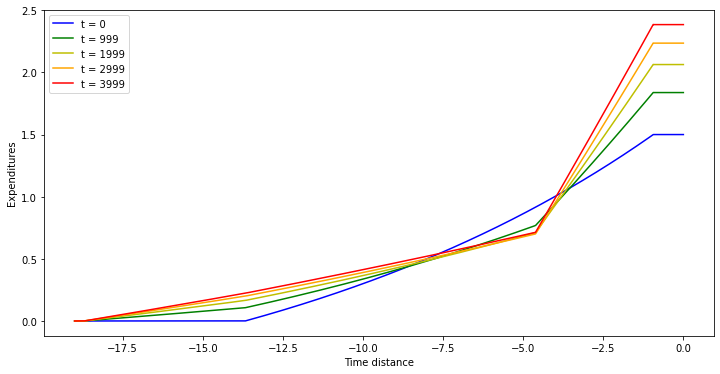

In [555]:
plt.plot(np.linspace(1, 20, 2000) - 20, E[0,:], color = 'b', label = 't = 0')
plt.plot(np.linspace(1, 20, 2000) - 20, E[999,:], color = 'g', label = 't = 999')
plt.plot(np.linspace(1, 20, 2000) - 20, E[1999,:], color = 'y', label = 't = 1999')
plt.plot(np.linspace(1, 20, 2000) - 20, E[2999,:], color = 'orange', label = 't = 2999')
plt.plot(np.linspace(1, 20, 2000) - 20, E[3999,:], color = 'r', label = 't = 3999')
plt.xlabel('Time distance')
plt.ylabel('Expenditures')
plt.legend()
plt.show()

In [556]:
break_point = 0
for i in range(2000):
    if E_3[i] > E_2[i]:
        break_point = i
        break

In [557]:
Ed = np.zeros((8000, 2000))
Ed[0,:] = E[3999, :]

In [558]:
dt = 0.01
k_1 = 0.2
k_2 = 0
E_d = E_1 * Y_t / Y
L = sum([E[3999, i] - E_d[i] if E[3999, i] >= E_d[i] else 0 for i in range(2000)]) / 100
L_h = sum([E[3999, i] - E_d[i] if E[3999, i] >= E_d[i] and i <= break_point else 0 for i in range(2000)]) / 100
L_l = sum([E[3999, i] - E_d[i] if E[3999, i] >= E_d[i] and i > break_point else 0 for i in range(2000)]) / 100
theta_1 = 1 * L_h / L + 0.7 * L_l / L
theta_2 = 0.7 * L_h / L + 0.2 * L_l / L
E_d_1 = E_1 * (Y_t - theta_1 * L) / Y_t * Y_t / Y
E_d_2 = E_1 * (Y_t - theta_2 * L) / Y_t * Y_t / Y

for t in range(7999):
    if t <= 999:
        Ed[t+1,:] = Ed[t,:] + k_1 * (E_d_1 - Ed[t,:]) * dt + k_2 * (E_d_2 - Ed[t,:]) * dt
    else:
        Ed[t+1,:] = Ed[t,:] + k_1 * (E_d_1 - Ed[t,:]) * dt + k_2 * (E_d_2 - Ed[t,:]) * dt
        k_1 = max(k_1 - 0.001, 0)
        k_2 = min(k_2 + 0.001, 0.1)

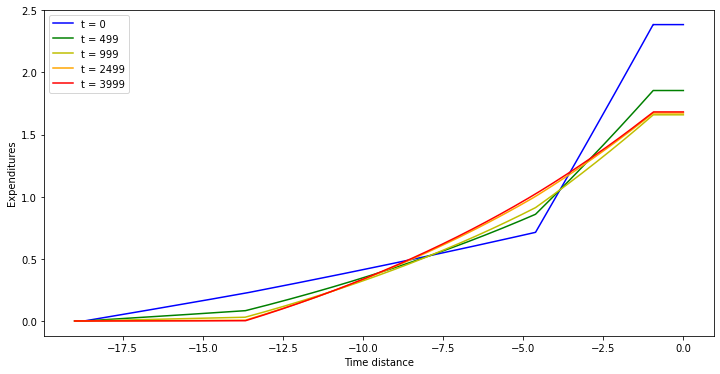

In [559]:
plt.plot(np.linspace(1, 20, 2000) - 20, Ed[0,:], color = 'b', label = 't = 0')
plt.plot(np.linspace(1, 20, 2000) - 20, Ed[499,:], color = 'g', label = 't = 499')
plt.plot(np.linspace(1, 20, 2000) - 20, Ed[999,:], color = 'y', label = 't = 999')
plt.plot(np.linspace(1, 20, 2000) - 20, Ed[2499,:], color = 'orange', label = 't = 2499')
plt.plot(np.linspace(1, 20, 2000) - 20, Ed[3999,:], color = 'r', label = 't = 3999')
plt.xlabel('Time distance')
plt.ylabel('Expenditures')
plt.legend()
plt.show()

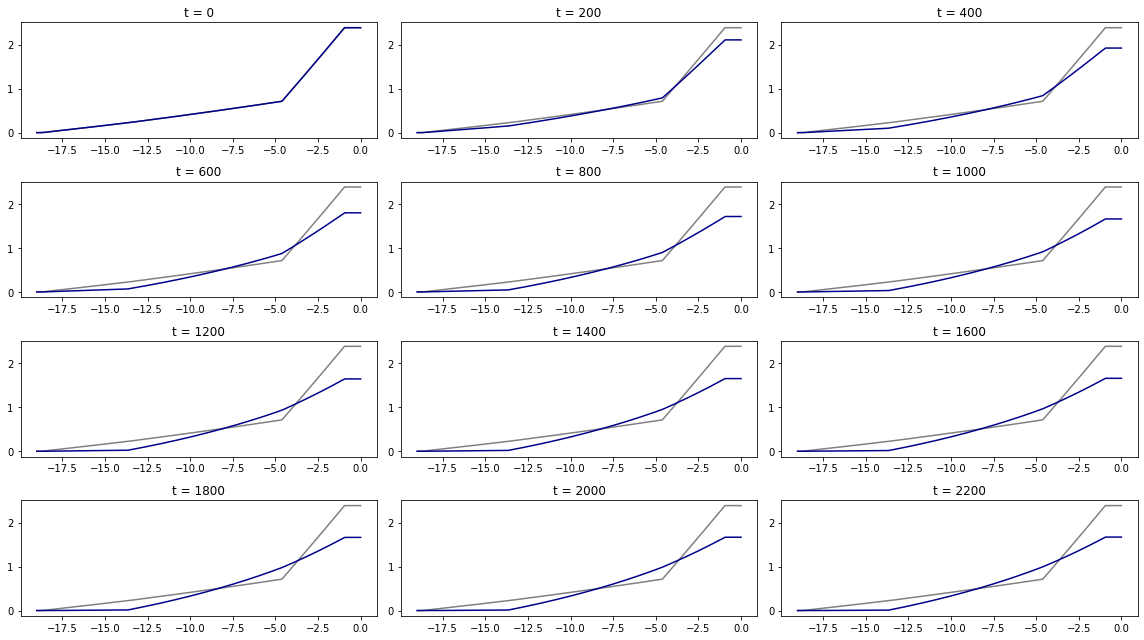

In [560]:
f, axs = plt.subplots(4, 3, figsize = (16,9))

for i in range(12):
    axs[i // 3, i % 3].plot(np.linspace(1, 20, 2000) - 20, Ed[0, :], c = 'grey')
    axs[i // 3, i % 3].plot(np.linspace(1, 20, 2000) - 20, Ed[i * 200, :], c = 'darkblue')
    axs[i // 3, i % 3].set_title('t = ' + str(i * 200))

plt.tight_layout()
plt.show()

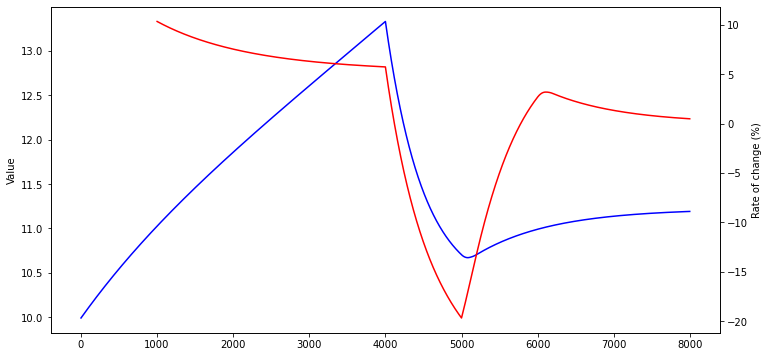

In [561]:
Ef = np.concatenate([E[:,:],Ed[:,:]])

fig, ax = plt.subplots()
ax.plot(np.linspace(0, 7999, 8000), [sum(Ef[t,:]) / 100 for t in range(8000)], color = 'b', label = 'GO value (left axis)')
ax2 = plt.twinx()
ax2.plot(np.linspace(1000, 7999, 7000), [(sum(Ef[t,:]) - sum(Ef[t - 1000,:])) / sum(Ef[t - 1000,:]) * 100 for t in range(1000, 8000)], color = 'r', label = 'GO rate of change (right axis)')
plt.xlabel('Time step')
ax.set_ylabel('Value')
ax2.set_ylabel('Rate of change (%)')
#fig.legend()
plt.show()

In [562]:
sum(Ef[4000,:]) / 100, sum(Ef[5000,:]) / 100, sum(Ef[8000,:]) / 100

(13.327990247448689, 10.70373211961784, 11.191044084924679)

In [477]:
dmi = np.zeros(5600000)

for i in range(1100,1900):
    for t in range(1000,8000):
        dmi[(i - 1100) * 7000 + t - 1000] = (Ef[t, i] - Ef[t - 1000, i]) / Ef[t - 1000, i]

In [478]:
dmi.sort()

dmi_d = np.zeros(56000)
for i in range(56000):
    dmi_d[i] = np.mean(dmi[i*100:i*100+100])

dmi_d

array([-0.42463965, -0.41909785, -0.41545223, ...,  0.41689762,
        0.42581988,  0.44014325])

In [479]:
m_1 = np.zeros(7001)

for t in range(1000, 8001):
    g_t = (sum(Ef[t, 1100:1300])/100 - sum(Ef[t-1000, 1100:1300])/100) / (sum(Ef[t-1000, 1100:1300])/100)
    p = 0
    for i in range(56000):
        if g_t <= dmi_d[i]:
            p = i / 56000
            break
    m_1[t - 1000] = norm.ppf(p, 0, 1)

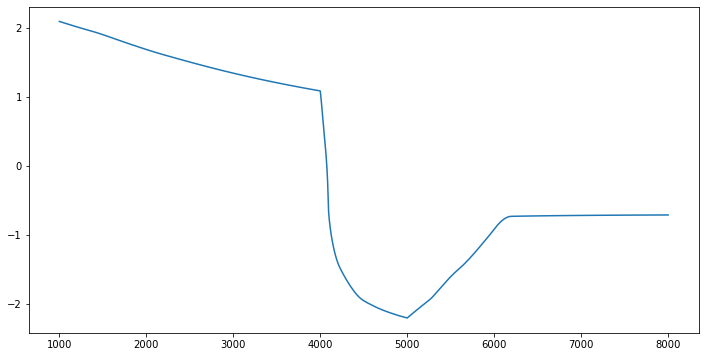

In [480]:
plt.plot(np.linspace(1000,8000,7001), m_1)
plt.show()

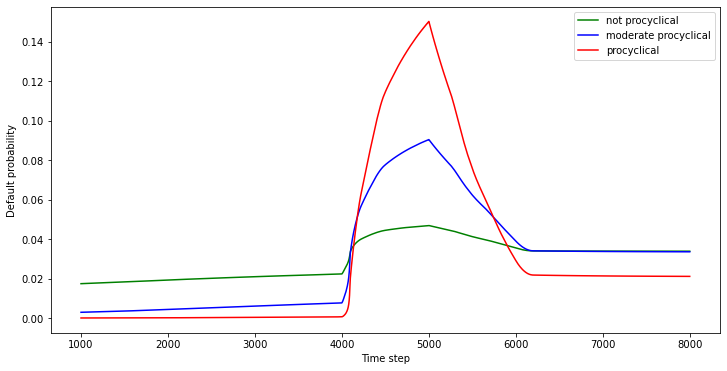

In [481]:
plt.plot(np.linspace(1000,8000,7001), norm.cdf(-1.88, 0.1 * m_1, 1 - 0.1**2), c = 'g', label = 'not procyclical')
plt.plot(np.linspace(1000,8000,7001), norm.cdf(-1.88, 0.3 * m_1, 1 - 0.3**2), c = 'b', label = 'moderate procyclical')
plt.plot(np.linspace(1000,8000,7001), norm.cdf(-1.88, 0.5 * m_1, 1 - 0.5**2), c = 'r', label = 'procyclical')
plt.xlabel('Time step')
plt.ylabel('Default probability')
plt.legend()
plt.show()

In [719]:
gi_dt = np.zeros(8000)

for t in range(8000):
    gi_dt[t] = (sum(Ef[t+1,700:1900])/100 - sum(Ef[t,700:1900])/100) / (sum(Ef[t,700:1900])/100)

In [720]:
Si_T = np.zeros((71, 1000))
sigma = 0.1
dt = 0.001
S_0 = 100

for T in range(71):
    for i in range(1000):
        Si = np.ones(1000) * S_0
        dBt = np.sqrt(dt) * np.random.normal(0, 1, 999)
        for t in range(999):
            Si[t + 1] = Si[t] + gi_dt[T * 100 + t] * 0.75 * Si[t] + sigma * Si[t] * dBt[t]
        Si_T[T, i] = Si[999]

In [721]:
defaults = np.zeros(71)

for t in range(71):
    n = 0
    for i in range(1000):
        if Si_T[t, i] < 82:
            n = n + 1
    defaults[t] = n

In [566]:
gh_dt = np.zeros(8000)

for t in range(8000):
    gh_dt[t] = (sum(Ef[t+1,1100:1300])/100 - sum(Ef[t,1100:1300])/100) / (sum(Ef[t,1100:1300])/100)

In [567]:
Sh_T = np.zeros((71, 1000))
sigma = 0.12
dt = 0.001
S_0 = 100

for T in range(71):
    for i in range(1000):
        Si = np.ones(1000) * S_0
        dBt = np.sqrt(dt) * np.random.normal(0, 1, 999)
        for t in range(999):
            Si[t + 1] = Si[t] + gh_dt[T * 100 + t] * 0.7 * Si[t] + sigma * Si[t] * dBt[t]
        Sh_T[T, i] = Si[999]

In [568]:
defaults_h = np.zeros(71)

for t in range(71):
    n = 0
    for i in range(1000):
        if Sh_T[t, i] < 80:
            n = n + 1
    defaults_h[t] = n

In [569]:
gm_dt = np.zeros(8000)

for t in range(8000):
    gm_dt[t] = (sum(Ef[t+1,1400:1600])/100 - sum(Ef[t,1400:1600])/100) / (sum(Ef[t,1400:1600])/100)

In [570]:
Sm_T = np.zeros((71, 1000))
sigma = 0.12
dt = 0.001
S_0 = 100

for T in range(71):
    for i in range(1000):
        Si = np.ones(1000) * S_0
        dBt = np.sqrt(dt) * np.random.normal(0, 1, 999)
        for t in range(999):
            Si[t + 1] = Si[t] + gm_dt[T * 100 + t] * Si[t] + sigma * Si[t] * dBt[t]
        Sm_T[T, i] = Si[999]

In [571]:
defaults_m = np.zeros(71)

for t in range(71):
    n = 0
    for i in range(1000):
        if Sm_T[t, i] < 80:
            n = n + 1
    defaults_m[t] = n

In [572]:
gl_dt = np.zeros(8000)

for t in range(8000):
    gl_dt[t] = (sum(Ef[t+1,1700:1900])/100 - sum(Ef[t,1700:1900])/100) / (sum(Ef[t,1700:1900])/100)

In [573]:
Sl_T = np.zeros((71, 1000))
sigma = 0.12
dt = 0.001
S_0 = 100

for T in range(71):
    for i in range(1000):
        Si = np.ones(1000) * S_0
        dBt = np.sqrt(dt) * np.random.normal(0, 1, 999)
        for t in range(999):
            Si[t + 1] = Si[t] + gl_dt[T * 100 + t] * Si[t] + sigma * Si[t] * dBt[t]
        Sl_T[T, i] = Si[999]

In [574]:
defaults_l = np.zeros(71)

for t in range(71):
    n = 0
    for i in range(1000):
        if Sl_T[t, i] < 80:
            n = n + 1
    defaults_l[t] = n

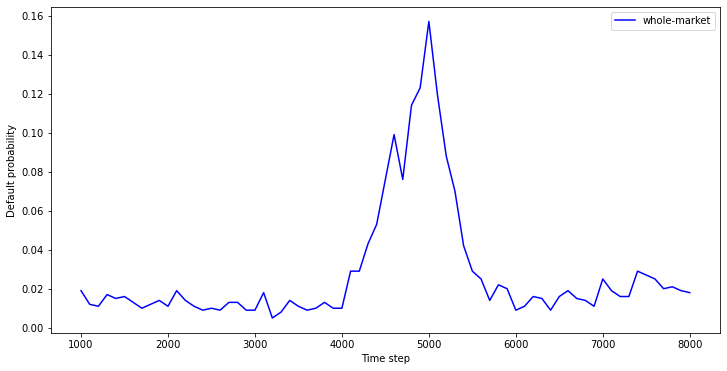

In [722]:
plt.plot(np.linspace(1000, 8000, 71), defaults / 1000, c = 'b', label = 'whole-market')
#plt.plot(np.linspace(1000, 8000, 71), defaults_h / 1000, c = 'r', label = 'high-stage')
#plt.plot(np.linspace(1000, 8000, 71), defaults_m / 1000, c = 'y', label = 'middle-stage')
#plt.plot(np.linspace(1000, 8000, 71), defaults_l / 1000, c = 'orange', label = 'low-stage')
plt.xlabel('Time step')
plt.ylabel('Default probability')
plt.legend()
plt.show()

In [482]:
for i in range(56000):
    if 0 <= dmi_d[i]:
        p = i / 56000
        break
m_0 = norm.ppf(p, 0, 1)     

In [483]:
dr = np.zeros(11)

for t in range(1,11):
    if t <= 2:
        dr[t] = norm.cdf(-1.88, 0.3 * m_0, 1 - 0.3**2)
    else:
        dr[t] = norm.cdf(-1.88, 0.3 * m_1, 1 - 0.3**2)[(t - 3) * 1000]

In [484]:
#dr_sf_wm = dr
dr_sf_hs = dr
#dr_sf_ms = dr
#dr_sf_ls = dr

In [725]:
sigma = 0.1
d1 = (np.log(0.82) + (sigma**2) * 1 / 2) / (sigma * np.sqrt(1))

dr = np.zeros(11)

for t in range(1,11):
    if t <= 2:
        dr[t] = norm.cdf(d1, 0, 1)
    else:
        dr[t] = defaults[(t - 3) * 10] / 1000

In [726]:
dr_m_wm = dr
#dr_m_hs = dr
#dr_m_ms = dr
#dr_m_ls = dr

In [727]:
#d_r = 0.1
d_r = dr_m_wm

In [685]:
N = 1000
r = 0.05
P = 100000
K = 1750000
RR = 0.4
T = 10

In [686]:
j_s = 0.05
s_s = 0.005
n_s = 0.035
j_f = 0.1
s_f = 0.85

In [873]:
B_J = (r + j_s) * j_f * N * P
B_S = (r + s_s) * s_f * N * P
B = B_J + B_S
B_J_T = (1 + r + j_s) * j_f * N * P
B_S_T = (1 + r + s_s) * s_f * N * P
B_T = B_J_T + B_S_T

In [874]:
d = np.zeros(T + 1)
dOC = np.zeros(T + 1)
R = np.zeros(T + 1)
OC = np.zeros(T + 1)
D = np.zeros(T + 1)
s = np.ones(T + 1) * N
L = np.zeros(T + 1)
BJ = np.zeros(T + 1)
BS = np.zeros(T + 1)

In [875]:
for t in range(1, T + 1):
    d[t] = round(s[t - 1] * d_r[t])
    s[t] = s[t - 1] - d[t]
    R[t] = RR * d[t] * P
    if t < T:
        L[t] = (r + n_s) * s[t] * P
        if L[t] - B >= K:
            D[t] = L[t] - B - K
            dOC[t] = K + R[t]
            OC[t] = dOC[t] + (1 + r) * OC[t - 1]
            BJ[t] = B_J
            BS[t] = B_S
        elif L[t] - B >= - R[t] - (1 + r) * OC[t - 1]:
            dOC[t] = L[t] - B + R[t]
            OC[t] = dOC[t] + (1 + r) * OC[t - 1]
            BJ[t] = B_J
            BS[t] = B_S
        else:
            dOC[t] = - (1 + r) * OC[t - 1]
            if L[t] + R[t] + (1 + r) * OC[t - 1] >= B_S:
                BS[t] = B_S
                BJ[t] = L[t] + R[t] + (1 + r) * OC[t - 1] - B_S
            else:
                BS[t] = L[t] + R[t] + (1 + r) * OC[t - 1]
    else:
        F = (1 + r) * OC[t - 1] + (1 + r + n_s) * s[t] * P + R[t] 
        if F >= B_T:
            D[t] = F - B_T
            BJ[t] = B_J_T
            BS[t] = B_S_T
        elif F >= B_S_T:
            BJ[t] = F - B_S_T
            BS[t] = B_S_T
        else:
            BS[t] = F

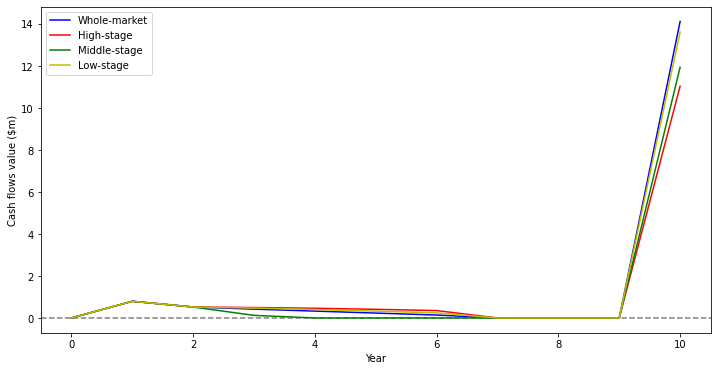

In [695]:
#plt.plot(np.linspace(0, 10, 11), BS, c = 'b', label = 'Senior bonds')
#plt.plot(np.linspace(0, 10, 11), BJ, c = 'r', label = 'Junior bonds')
#plt.axhline(y = dOC[1] / 1e6, color = 'gray', linestyle = 'dashed')
plt.axhline(y = 0, color = 'gray', linestyle = 'dashed')
#plt.plot(np.linspace(0, 10, 11), dOC / 1e6, c = 'b', label = 'Overcollateralization account')
#plt.plot(np.linspace(0, 10, 11), D / 1e6, c = 'y', label = 'Equity')
plt.plot(np.linspace(0, 10, 11), D_sf_wm / 1e6, c = 'b', label = 'Whole-market')
plt.plot(np.linspace(0, 10, 11), D_sf_hs / 1e6, c = 'r', label = 'High-stage')
plt.plot(np.linspace(0, 10, 11), D_sf_ms / 1e6, c = 'g', label = 'Middle-stage')
plt.plot(np.linspace(0, 10, 11), D_sf_ls / 1e6, c = 'y', label = 'Low-stage')
plt.xlabel('Year')
plt.ylabel('Cash flows value ($m)')
plt.legend()
plt.show()

In [691]:
BS

array([       0.        ,  4675000.        ,  4675000.        ,
        4675000.        ,  4675000.        ,  4675000.        ,
        4675000.        ,  4675000.        ,  4675000.        ,
        4675000.        , 89674999.99999999])

In [692]:
dOC_sf_ls = dOC
D_sf_ls = D

In [702]:
D_sf_ls[0] = -5000000

In [703]:
npf.irr(D_sf_ls)

0.15800340652317457

In [693]:
dr_sf_ls

array([0.        , 0.03346675, 0.03346675, 0.0068639 , 0.00840003,
       0.00974679, 0.01061565, 0.06722135, 0.02111324, 0.02602456,
       0.03171023])

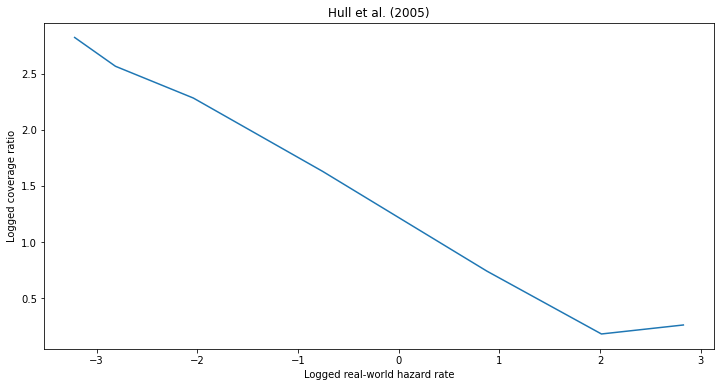

In [5]:
plt.plot(np.log(np.array([0.04, 0.06, 0.13, 0.47, 2.40, 7.49, 16.9])), np.log(np.array([16.8, 13.0, 9.8, 5.1, 2.1, 1.2, 1.3])))
plt.xlabel('Logged real-world hazard rate')
plt.ylabel('Logged coverage ratio')
plt.title('Hull et al. (2005)')
plt.show()

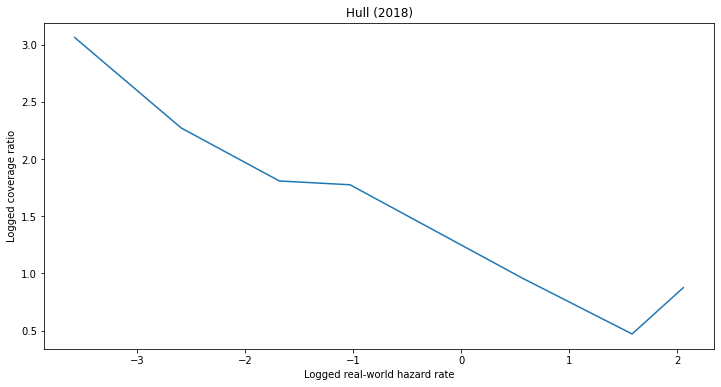

In [6]:
plt.plot(np.log(np.array([0.028, 0.075, 0.186, 0.358, 1.772, 4.864, 7.814])), np.log(np.array([21.4, 9.7, 6.1, 5.9, 2.6, 1.6, 2.4])))
plt.xlabel('Logged real-world hazard rate')
plt.ylabel('Logged coverage ratio')
plt.title('Hull (2018)')
plt.show()

In [486]:
N_0 = 1000
N = N_0
T_0 = 10
T = T_0

In [487]:
lambda_P = np.ones(T * 4) * (- np.log(1 - norm.cdf(-1.88, 0.3 * m_0, 1 - 0.3**2))) * 10000
lambda_Q = lambda_P * np.exp(4.1733 * lambda_P ** (-0.2839)) / 10000

In [488]:
rho = 0.3
rho_m = np.ones((N, N)) * rho
for i in range(N):
    for j in range(N):
        if i == j:
            rho_m[i, j] = 1

In [489]:
Zs = sp.stats.multivariate_normal.rvs(mean = np.zeros(N), cov = rho_m, size = 1000)
ts = - np.log(1 - norm.cdf(Zs)) / lambda_Q[0]

In [490]:
d_sim = np.zeros((1000, T + 1))

for i in range(1000):
    for t in range(1, T + 1):
        d_sim[i, t] = sum(ts[i] <= t) - sum(ts[i] <= t - 1)

In [491]:
r_c = r_1
r = np.exp(r_c) - 1
P = 100000
K = 2000000
RR = 0.4

In [492]:
j_s = 0.062
s_s = 0.02
n_s = np.exp(r_c - 1 / T * np.log(np.exp(- lambda_Q[0] * T) * (1 - RR) + RR)) - r - 1
j_f = 0.1
s_f = 0.83

In [493]:
B_J = (r + j_s) * j_f * N * P
B_S = (r + s_s) * s_f * N * P
B = B_J + B_S
B_J_T = (1 + r + j_s) * j_f * N * P
B_S_T = (1 + r + s_s) * s_f * N * P
B_T = B_J_T + B_S_T

In [494]:
BJ_sim = np.zeros((1000, T + 1))
BS_sim = np.zeros((1000, T + 1))

In [495]:
for i in range(1000):
    
    d = d_sim[i]
    dOC = np.zeros(T + 1)
    R = np.zeros(T + 1)
    OC = np.zeros(T + 1)
    D = np.zeros(T + 1)
    s = np.ones(T + 1) * N
    L = np.zeros(T + 1)
    BJ = np.zeros(T + 1)
    BS = np.zeros(T + 1)

    for t in range(1, T + 1):
        #d[t] = round(s[t - 1] * d_r[t])
        s[t] = s[t - 1] - d[t]
        R[t] = RR * d[t] * P
        if t < T:
            L[t] = (r + n_s) * s[t] * P
            if L[t] - B >= K:
                D[t] = L[t] - B - K
                dOC[t] = K + R[t]
                OC[t] = dOC[t] + (1 + r) * OC[t - 1]
                BJ[t] = B_J
                BS[t] = B_S
            elif L[t] - B >= - R[t] - (1 + r) * OC[t - 1]:
                dOC[t] = L[t] - B + R[t]
                OC[t] = dOC[t] + (1 + r) * OC[t - 1]
                BJ[t] = B_J
                BS[t] = B_S
            else:
                dOC[t] = - (1 + r) * OC[t - 1]
                if L[t] + R[t] + (1 + r) * OC[t - 1] >= B_S:
                    BS[t] = B_S
                    BJ[t] = L[t] + R[t] + (1 + r) * OC[t - 1] - B_S
                else:
                    BS[t] = L[t] + R[t] + (1 + r) * OC[t - 1]
        else:
            F = (1 + r) * OC[t - 1] + (1 + r + n_s) * s[t] * P + R[t] 
            if F >= B_T:
                D[t] = F - B_T
                BJ[t] = B_J_T
                BS[t] = B_S_T
            elif F >= B_S_T:
                BJ[t] = F - B_S_T
                BS[t] = B_S_T
            else:
                BS[t] = F
    
    BJ_sim[i] = BJ
    BS_sim[i] = BS

In [496]:
np.exp(- (r_c) * T) * np.mean(BS_sim[:,10]) / (s_f * P * N * (1 + r + s_s)), np.exp(- (r_c) * T) * np.mean(BJ_sim[:,10]) / (j_f * P * N * (1 + r + j_s))

(0.45646548742727705, 0.1646105154549646)

In [497]:
sum([np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) / (1 + r) ** (i + 1) for i in range(T - 1)]) + np.exp(- (r_c) * T) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0)

0.9830730315686764

In [498]:
sum([np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) / (1 + r) ** (i + 1) for i in range(T - 1)]) + np.exp(- (r_c) * T) * np.mean(BS_sim[:, T]) / (s_f * P * N_0)

0.9925373420356705

In [499]:
dr_full_sf = np.zeros(10000)
dr_full_sf[:2000] = norm.cdf(-1.88, 0.3 * m_0, 1 - 0.3**2)

for t in range(2000, 3000):
    dr_full_sf[t] = (2999 - t) / 1000 * norm.cdf(-1.88, 0.3 * m_0, 1 - 0.3**2) + (t - 1999) / 1000 * norm.cdf(-1.88, 0.3 * m_1, 1 - 0.3**2)[0]

dr_full_sf[2999:] = norm.cdf(-1.88, 0.3 * m_1, 1 - 0.3**2)

In [500]:
dr_est_sf = np.zeros(40)

for t in range(40):
    n_y = floor(t / 4 + 1)
    PDs = np.zeros(n_y)
    for i in range(1, n_y + 1):
        PDs[i - 1] = dr_full_sf[(t - (n_y - i) * 4) * 250]
    dr_est_sf[t] = sum(PDs) / n_y

In [501]:
rs_c = np.zeros(40)
rs_c[:8] = r_1
rs_c[8:24] = r_1
rs_c[24:40] = r_1
rs = np.exp(rs_c) - 1

In [502]:
N = N_0
T = T_0

In [503]:
d_r = dr_sf_hs

In [504]:
B_J = (r + j_s) * j_f * N * P
B_S = (r + s_s) * s_f * N * P
B = B_J + B_S
B_J_T = (1 + r + j_s) * j_f * N * P
B_S_T = (1 + r + s_s) * s_f * N * P
B_T = B_J_T + B_S_T

In [505]:
d = np.zeros(T + 1)
dOC = np.zeros(T + 1)
R = np.zeros(T + 1)
OC = np.zeros(T + 1)
D = np.zeros(T + 1)
s = np.ones(T + 1) * N
L = np.zeros(T + 1)
BJ = np.zeros(T + 1)
BS = np.zeros(T + 1)

In [506]:
for t in range(1, T + 1):
    d[t] = round(s[t - 1] * d_r[t])
    s[t] = s[t - 1] - d[t]
    R[t] = RR * d[t] * P
    if t < T:
        L[t] = (rs[0] + n_s) * s[t] * P
        if L[t] - B >= K:
            D[t] = L[t] - B - K
            dOC[t] = K + R[t]
            OC[t] = dOC[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1]
            BJ[t] = B_J
            BS[t] = B_S
        elif L[t] - B >= - R[t] - (1 + rs[(t - 1) * 4]) * OC[t - 1]:
            dOC[t] = L[t] - B + R[t]
            OC[t] = dOC[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1]
            BJ[t] = B_J
            BS[t] = B_S
        else:
            dOC[t] = - (1 + rs[(t - 1) * 4]) * OC[t - 1]
            if L[t] + R[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1] >= B_S:
                BS[t] = B_S
                BJ[t] = L[t] + R[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1] - B_S
            else:
                BS[t] = L[t] + R[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1]
    else:
        F = (1 + rs[(t - 1) * 4]) * OC[t - 1] + (1 + rs[0] + n_s) * s[t] * P + R[t] 
        if F >= B_T:
            D[t] = F - B_T
            BJ[t] = B_J_T
            BS[t] = B_S_T
        elif F >= B_S_T:
            BJ[t] = F - B_S_T
            BS[t] = B_S_T
        else:
            BS[t] = F

In [507]:
OC_r = OC

In [508]:
N = N_0
T = T_0

In [509]:
p_BJ_c_1 = np.zeros(40)
p_BS_c_1 = np.zeros(40)
p_BJ_c_2 = np.zeros(40)
p_BS_c_2 = np.zeros(40)
p_BJ_d = np.zeros(40)
p_BS_d = np.zeros(40)

In [510]:
%%time

for t_i in range(40):
    
    lambda_P[t_i] = - np.log(1 - dr_est_sf[t_i]) * 10000
    lambda_Q[t_i] = lambda_P[t_i] * np.exp(4.1733 * lambda_P[t_i] ** (-0.2839)) / 10000
    
    if t_i >= 4 and t_i % 4 == 0:
        N = int(round(N * (1 - dr_full_sf[t_i * 250])))
        T = T - 1
    
    rho = 0.3
    rho_m = np.ones((N, N)) * rho
    for i in range(N):
        for j in range(N):
            if i == j:
                rho_m[i, j] = 1
    
    Zs = sp.stats.multivariate_normal.rvs(mean = np.zeros(N), cov = rho_m, size = 1000)
    ts = - np.log(1 - norm.cdf(Zs)) / lambda_Q[t_i]
    
    d_sim = np.zeros((1000, T + 1))
    for i in range(1000):
        for t in range(1, T + 1):
            d_sim[i, t] = sum(ts[i] <= t) - sum(ts[i] <= t - 1)
    
    #B_J = (rs[t_i] + j_s) * j_f * N_0 * P
    #B_S = (rs[t_i] + s_s) * s_f * N_0 * P
    #B = B_J + B_S
    #B_J_T = (1 + rs[t_i] + j_s) * j_f * N_0 * P
    #B_S_T = (1 + rs[t_i] + s_s) * s_f * N_0 * P
    #B_T = B_J_T + B_S_T  
    
    BJ_sim = np.zeros((1000, T + 1))
    BS_sim = np.zeros((1000, T + 1))
    
    for i in range(1000):
    
        d = d_sim[i]
        dOC = np.zeros(T + 1)
        R = np.zeros(T + 1)
        OC = np.zeros(T + 1)
        OC[0] = OC_r[floor(t_i / 4)]
        D = np.zeros(T + 1)
        s = np.ones(T + 1) * N
        L = np.zeros(T + 1)
        BJ = np.zeros(T + 1)
        BS = np.zeros(T + 1)

        for t in range(1, T + 1):
            #d[t] = round(s[t - 1] * d_r[t])
            s[t] = s[t - 1] - d[t]
            R[t] = RR * d[t] * P
            if t < T:
                L[t] = (rs[0] + n_s) * s[t] * P
                if L[t] - B >= K:
                    D[t] = L[t] - B - K
                    dOC[t] = K + R[t]
                    OC[t] = dOC[t] + (1 + rs[t_i]) * OC[t - 1]
                    BJ[t] = B_J
                    BS[t] = B_S
                elif L[t] - B >= - R[t] - (1 + rs[t_i]) * OC[t - 1]:
                    dOC[t] = L[t] - B + R[t]
                    OC[t] = dOC[t] + (1 + rs[t_i]) * OC[t - 1]
                    BJ[t] = B_J
                    BS[t] = B_S
                else:
                    dOC[t] = - (1 + rs[t_i]) * OC[t - 1]
                    if L[t] + R[t] + (1 + rs[t_i]) * OC[t - 1] >= B_S:
                        BS[t] = B_S
                        BJ[t] = L[t] + R[t] + (1 + rs[t_i]) * OC[t - 1] - B_S
                    else:
                        BS[t] = L[t] + R[t] + (1 + rs[t_i]) * OC[t - 1]
            else:
                F = (1 + rs[t_i]) * OC[t - 1] + (1 + rs[0] + n_s) * s[t] * P + R[t] 
                if F >= B_T:
                    D[t] = F - B_T
                    BJ[t] = B_J_T
                    BS[t] = B_S_T
                elif F >= B_S_T:
                    BJ[t] = F - B_S_T
                    BS[t] = B_S_T
                else:
                    BS[t] = F

        BJ_sim[i] = BJ
        BS_sim[i] = BS
        
    p_BJ_c_1[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0) - (t_i % 4) / 4 * (rs[0] + j_s)
    p_BS_c_1[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BS_sim[:, T]) / (s_f * P * N_0) - (t_i % 4) / 4 * (rs[0] + s_s)    
    p_BJ_c_2[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1)) * np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T)) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0) 
    p_BS_c_2[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1)) * np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T)) * np.mean(BS_sim[:, T]) / (s_f * P * N_0)    
    p_BJ_d[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0)
    p_BS_d[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BS_sim[:, T]) / (s_f * P * N_0)    

Wall time: 13min 1s


In [511]:
p_BJ_c_1_sf = p_BJ_c_1
p_BS_c_1_sf = p_BS_c_1
p_BJ_c_2_sf = p_BJ_c_2
p_BS_c_2_sf = p_BS_c_2
p_BJ_d_sf = p_BJ_d
p_BS_d_sf = p_BS_d

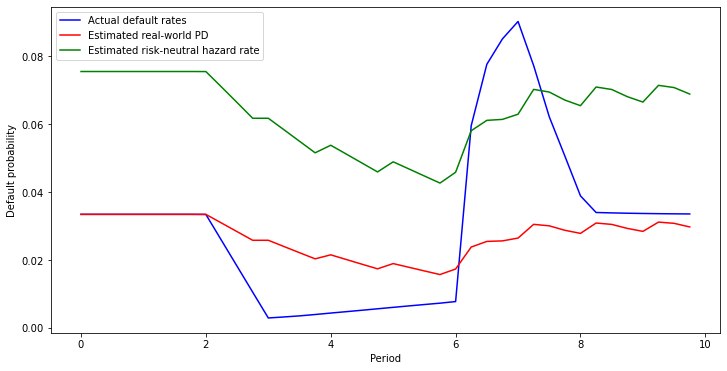

In [512]:
plt.plot(np.linspace(0, 9.75, 40), [dr_full_sf[t * 250] for t in range(40)], c = 'b', label = 'Actual default rates')
plt.plot(np.linspace(0, 9.75, 40), dr_est_sf, c = 'r', label = 'Estimated real-world PD')
plt.plot(np.linspace(0, 9.75, 40), lambda_Q, c = 'g', label = 'Estimated risk-neutral hazard rate')
plt.xlabel('Period')
plt.ylabel('Default probability')
plt.legend()
plt.show()

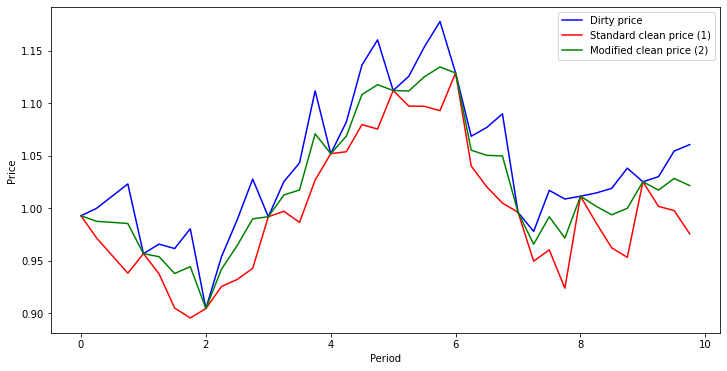

In [513]:
plt.plot(np.linspace(0, 9.75, 40), p_BJ_d_sf, c = 'b', label = 'Dirty price')
plt.plot(np.linspace(0, 9.75, 40), p_BJ_c_1_sf, c = 'r', label = 'Standard clean price (1)')
plt.plot(np.linspace(0, 9.75, 40), p_BJ_c_2_sf, c = 'g', label = 'Modified clean price (2)')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend()
plt.show()

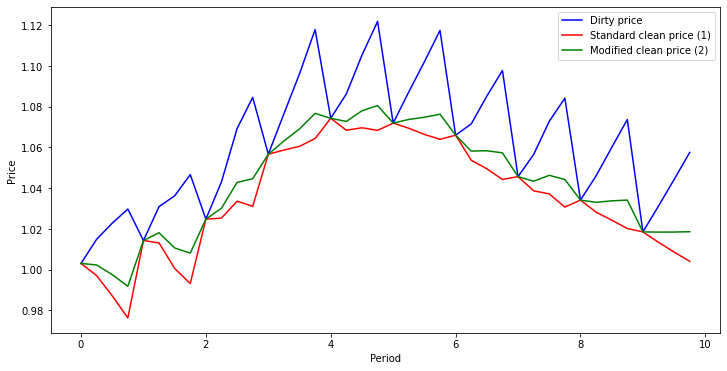

In [514]:
plt.plot(np.linspace(0, 9.75, 40), p_BS_d_sf, c = 'b', label = 'Dirty price')
plt.plot(np.linspace(0, 9.75, 40), p_BS_c_1_sf, c = 'r', label = 'Standard clean price (1)')
plt.plot(np.linspace(0, 9.75, 40), p_BS_c_2_sf, c = 'g', label = 'Modified clean price (2)')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend()
plt.show()

In [730]:
sigma = 0.1
d1 = (np.log(0.82) + (sigma**2) * 1 / 2) / (sigma * np.sqrt(1))

In [731]:
dr_full_m = np.zeros(101)
dr_full_m[:20] = norm.cdf(d1, 0, 1)

for t in range(20, 30):
    dr_full_m[t] = (30 - t) / 10 * norm.cdf(d1, 0, 1) + (t - 20) / 10 * defaults[0] / 1000

dr_full_m[30:] = defaults / 1000

In [732]:
dr_full_m_40 = np.zeros(40)

for i in range(40):
    if i % 2 == 0:
        dr_full_m_40[i] = dr_full_m[int(i * 2.5)]
    else:
        dr_full_m_40[i] = (dr_full_m[int(i * 2.5 - 0.5)] + dr_full_m[int(i * 2.5 + 0.5)]) / 2

In [733]:
dr_est_m = np.zeros(40)

for t in range(40):
    n_y = floor(t / 4 + 1)
    PDs = np.zeros(n_y)
    for i in range(1, n_y + 1):
        PDs[i - 1] = dr_full_m_40[(t - (n_y - i) * 4)]
    dr_est_m[t] = sum(PDs) / n_y

In [789]:
N_0 = 1000
N = N_0
T_0 = 10
T = T_0

In [790]:
lambda_P = np.ones(T * 4) * (- np.log(1 - norm.cdf(d1, 0, 1))) * 10000
lambda_Q = lambda_P * np.exp(4.1733 * lambda_P ** (-0.2839)) / 10000

In [791]:
rho = 0.15
rho_m = np.ones((N, N)) * rho
for i in range(N):
    for j in range(N):
        if i == j:
            rho_m[i, j] = 1

In [792]:
Zs = sp.stats.multivariate_normal.rvs(mean = np.zeros(N), cov = rho_m, size = 1000)
ts = - np.log(1 - norm.cdf(Zs)) / lambda_Q[0]

In [793]:
d_sim = np.zeros((1000, T + 1))

for i in range(1000):
    for t in range(1, T + 1):
        d_sim[i, t] = sum(ts[i] <= t) - sum(ts[i] <= t - 1)

In [794]:
r_c = r_1
r = np.exp(r_c) - 1
P = 100000
K = 2000000
RR = 0.4

In [795]:
j_s = 0.055
s_s = 0.01
n_s = np.exp(r_c - 1 / T * np.log(np.exp(- lambda_Q[0] * T) * (1 - RR) + RR)) - r - 1
j_f = 0.1
s_f = 0.85

In [796]:
B_J = (r + j_s) * j_f * N * P
B_S = (r + s_s) * s_f * N * P
B = B_J + B_S
B_J_T = (1 + r + j_s) * j_f * N * P
B_S_T = (1 + r + s_s) * s_f * N * P
B_T = B_J_T + B_S_T

In [797]:
BJ_sim = np.zeros((1000, T + 1))
BS_sim = np.zeros((1000, T + 1))

In [798]:
for i in range(1000):
    
    d = d_sim[i]
    dOC = np.zeros(T + 1)
    R = np.zeros(T + 1)
    OC = np.zeros(T + 1)
    D = np.zeros(T + 1)
    s = np.ones(T + 1) * N
    L = np.zeros(T + 1)
    BJ = np.zeros(T + 1)
    BS = np.zeros(T + 1)

    for t in range(1, T + 1):
        #d[t] = round(s[t - 1] * d_r[t])
        s[t] = s[t - 1] - d[t]
        R[t] = RR * d[t] * P
        if t < T:
            L[t] = (r + n_s) * s[t] * P
            if L[t] - B >= K:
                D[t] = L[t] - B - K
                dOC[t] = K + R[t]
                OC[t] = dOC[t] + (1 + r) * OC[t - 1]
                BJ[t] = B_J
                BS[t] = B_S
            elif L[t] - B >= - R[t] - (1 + r) * OC[t - 1]:
                dOC[t] = L[t] - B + R[t]
                OC[t] = dOC[t] + (1 + r) * OC[t - 1]
                BJ[t] = B_J
                BS[t] = B_S
            else:
                dOC[t] = - (1 + r) * OC[t - 1]
                if L[t] + R[t] + (1 + r) * OC[t - 1] >= B_S:
                    BS[t] = B_S
                    BJ[t] = L[t] + R[t] + (1 + r) * OC[t - 1] - B_S
                else:
                    BS[t] = L[t] + R[t] + (1 + r) * OC[t - 1]
        else:
            F = (1 + r) * OC[t - 1] + (1 + r + n_s) * s[t] * P + R[t] 
            if F >= B_T:
                D[t] = F - B_T
                BJ[t] = B_J_T
                BS[t] = B_S_T
            elif F >= B_S_T:
                BJ[t] = F - B_S_T
                BS[t] = B_S_T
            else:
                BS[t] = F
    
    BJ_sim[i] = BJ
    BS_sim[i] = BS

In [799]:
np.exp(- (r_c) * T) * np.mean(BS_sim[:,10]) / (s_f * P * N * (1 + r + s_s)), np.exp(- (r_c) * T) * np.mean(BJ_sim[:,10]) / (j_f * P * N * (1 + r + j_s))

(0.42798777672918614, 0.16024893776213622)

In [800]:
sum([np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) / (1 + r) ** (i + 1) for i in range(T - 1)]) + np.exp(- (r_c) * T) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0)

1.002529774555004

In [801]:
sum([np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) / (1 + r) ** (i + 1) for i in range(T - 1)]) + np.exp(- (r_c) * T) * np.mean(BS_sim[:, T]) / (s_f * P * N_0)

0.9951670295563042

In [802]:
rs_c = np.zeros(40)
rs_c[:8] = r_1
rs_c[8:24] = r_1
rs_c[24:40] = r_1
rs = np.exp(rs_c) - 1

In [803]:
N = N_0
T = T_0

In [804]:
d_r = dr_m_wm

In [805]:
B_J = (r + j_s) * j_f * N * P
B_S = (r + s_s) * s_f * N * P
B = B_J + B_S
B_J_T = (1 + r + j_s) * j_f * N * P
B_S_T = (1 + r + s_s) * s_f * N * P
B_T = B_J_T + B_S_T

In [806]:
d = np.zeros(T + 1)
dOC = np.zeros(T + 1)
R = np.zeros(T + 1)
OC = np.zeros(T + 1)
D = np.zeros(T + 1)
s = np.ones(T + 1) * N
L = np.zeros(T + 1)
BJ = np.zeros(T + 1)
BS = np.zeros(T + 1)

In [807]:
for t in range(1, T + 1):
    d[t] = round(s[t - 1] * d_r[t])
    s[t] = s[t - 1] - d[t]
    R[t] = RR * d[t] * P
    if t < T:
        L[t] = (rs[0] + n_s) * s[t] * P
        if L[t] - B >= K:
            D[t] = L[t] - B - K
            dOC[t] = K + R[t]
            OC[t] = dOC[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1]
            BJ[t] = B_J
            BS[t] = B_S
        elif L[t] - B >= - R[t] - (1 + rs[(t - 1) * 4]) * OC[t - 1]:
            dOC[t] = L[t] - B + R[t]
            OC[t] = dOC[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1]
            BJ[t] = B_J
            BS[t] = B_S
        else:
            dOC[t] = - (1 + rs[(t - 1) * 4]) * OC[t - 1]
            if L[t] + R[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1] >= B_S:
                BS[t] = B_S
                BJ[t] = L[t] + R[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1] - B_S
            else:
                BS[t] = L[t] + R[t] + (1 + rs[(t - 1) * 4]) * OC[t - 1]
    else:
        F = (1 + rs[(t - 1) * 4]) * OC[t - 1] + (1 + rs[0] + n_s) * s[t] * P + R[t] 
        if F >= B_T:
            D[t] = F - B_T
            BJ[t] = B_J_T
            BS[t] = B_S_T
        elif F >= B_S_T:
            BJ[t] = F - B_S_T
            BS[t] = B_S_T
        else:
            BS[t] = F

In [808]:
OC_r = OC

In [809]:
N = N_0
T = T_0

In [810]:
p_BJ_c_1 = np.zeros(40)
p_BS_c_1 = np.zeros(40)
p_BJ_c_2 = np.zeros(40)
p_BS_c_2 = np.zeros(40)
p_BJ_d = np.zeros(40)
p_BS_d = np.zeros(40)
rhos = np.zeros(40)

In [811]:
gi_dt_full = np.zeros(10000)
gi_dt_full[2000:] = gi_dt

In [812]:
%%time

for t_i in range(40):
    
    lambda_P[t_i] = (- np.log(1 - dr_est_m[t_i])) * 10000
    lambda_Q[t_i] = lambda_P[t_i] * np.exp(4.1733 * lambda_P[t_i] ** (-0.2839)) / 10000
    
    if t_i >= 4 and t_i % 4 == 0:
        N = int(round(N * (1 - dr_full_m_40[t_i])))
        T = T - 1

    if t_i == 0:
        rho = 0.15
    else:
        S1 = np.zeros(3000)
        S2 = np.zeros(3000)
        sigma = 0.15
        dt = 0.001
        S_0 = 100
        for i in range(3000):
            b = random.sample(list(gi_dt_full[:int(t_i * 250)]), 1)[0]
            Si1 = np.ones(1000) * S_0
            dBt1 = np.sqrt(dt) * np.random.normal(0, 1, 999)
            Si2 = np.ones(1000) * S_0
            dBt2 = np.sqrt(dt) * np.random.normal(0, 1, 999)
            for t in range(999):
                Si1[t + 1] = Si1[t] + b * Si1[t] + sigma * Si1[t] * dBt1[t]
                Si2[t + 1] = Si2[t] + b * Si2[t] + sigma * Si2[t] * dBt2[t]
            S1[i] = Si1[999]
            S2[i] = Si2[999]        
        rho = 0.3 * 0.5 + np.corrcoef(np.log(S1 / S_0), np.log(S2 / S_0))[0,1] * 0.5
    rho_m = np.ones((N, N)) * rho
    for i in range(N):
        for j in range(N):
            if i == j:
                rho_m[i, j] = 1
    
    Zs = sp.stats.multivariate_normal.rvs(mean = np.zeros(N), cov = rho_m, size = 1000)
    ts = - np.log(1 - norm.cdf(Zs)) / lambda_Q[t_i]
    
    d_sim = np.zeros((1000, T + 1))
    for i in range(1000):
        for t in range(1, T + 1):
            d_sim[i, t] = sum(ts[i] <= t) - sum(ts[i] <= t - 1)
    
    #B_J = (rs[t_i] + j_s) * j_f * N_0 * P
    #B_S = (rs[t_i] + s_s) * s_f * N_0 * P
    #B = B_J + B_S
    #B_J_T = (1 + rs[t_i] + j_s) * j_f * N_0 * P
    #B_S_T = (1 + rs[t_i] + s_s) * s_f * N_0 * P
    #B_T = B_J_T + B_S_T  
    
    BJ_sim = np.zeros((1000, T + 1))
    BS_sim = np.zeros((1000, T + 1))
    
    for i in range(1000):
    
        d = d_sim[i]
        dOC = np.zeros(T + 1)
        R = np.zeros(T + 1)
        OC = np.zeros(T + 1)
        OC[0] = OC_r[floor(t_i / 4)]
        D = np.zeros(T + 1)
        s = np.ones(T + 1) * N
        L = np.zeros(T + 1)
        BJ = np.zeros(T + 1)
        BS = np.zeros(T + 1)

        for t in range(1, T + 1):
            #d[t] = round(s[t - 1] * d_r[t])
            s[t] = s[t - 1] - d[t]
            R[t] = RR * d[t] * P
            if t < T:
                L[t] = (rs[0] + n_s) * s[t] * P
                if L[t] - B >= K:
                    D[t] = L[t] - B - K
                    dOC[t] = K + R[t]
                    OC[t] = dOC[t] + (1 + rs[t_i]) * OC[t - 1]
                    BJ[t] = B_J
                    BS[t] = B_S
                elif L[t] - B >= - R[t] - (1 + rs[t_i]) * OC[t - 1]:
                    dOC[t] = L[t] - B + R[t]
                    OC[t] = dOC[t] + (1 + rs[t_i]) * OC[t - 1]
                    BJ[t] = B_J
                    BS[t] = B_S
                else:
                    dOC[t] = - (1 + rs[t_i]) * OC[t - 1]
                    if L[t] + R[t] + (1 + rs[t_i]) * OC[t - 1] >= B_S:
                        BS[t] = B_S
                        BJ[t] = L[t] + R[t] + (1 + rs[t_i]) * OC[t - 1] - B_S
                    else:
                        BS[t] = L[t] + R[t] + (1 + rs[t_i]) * OC[t - 1]
            else:
                F = (1 + rs[t_i]) * OC[t - 1] + (1 + rs[0] + n_s) * s[t] * P + R[t] 
                if F >= B_T:
                    D[t] = F - B_T
                    BJ[t] = B_J_T
                    BS[t] = B_S_T
                elif F >= B_S_T:
                    BJ[t] = F - B_S_T
                    BS[t] = B_S_T
                else:
                    BS[t] = F

        BJ_sim[i] = BJ
        BS_sim[i] = BS
        
    p_BJ_c_1[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0) - (t_i % 4) / 4 * (rs[0] + j_s)
    p_BS_c_1[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BS_sim[:, T]) / (s_f * P * N_0) - (t_i % 4) / 4 * (rs[0] + s_s)    
    p_BJ_c_2[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1)) * np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T)) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0) 
    p_BS_c_2[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1)) * np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T)) * np.mean(BS_sim[:, T]) / (s_f * P * N_0)    
    p_BJ_d[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BJ_sim[:, i + 1]) / (j_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BJ_sim[:, T]) / (j_f * P * N_0)
    p_BS_d[t_i] = sum([np.exp(- rs_c[t_i] * (i + 1 - (t_i % 4) / 4)) * np.mean(BS_sim[:, i + 1]) / (s_f * P * N_0) for i in range(T - 1)]) + np.exp(- rs_c[t_i] * (T - (t_i % 4) / 4)) * np.mean(BS_sim[:, T]) / (s_f * P * N_0)

    rhos[t_i] = rho

Wall time: 18min 16s


In [813]:
p_BJ_c_1_m = p_BJ_c_1
p_BS_c_1_m = p_BS_c_1
p_BJ_c_2_m = p_BJ_c_2
p_BS_c_2_m = p_BS_c_2
p_BJ_d_m = p_BJ_d
p_BS_d_m = p_BS_d

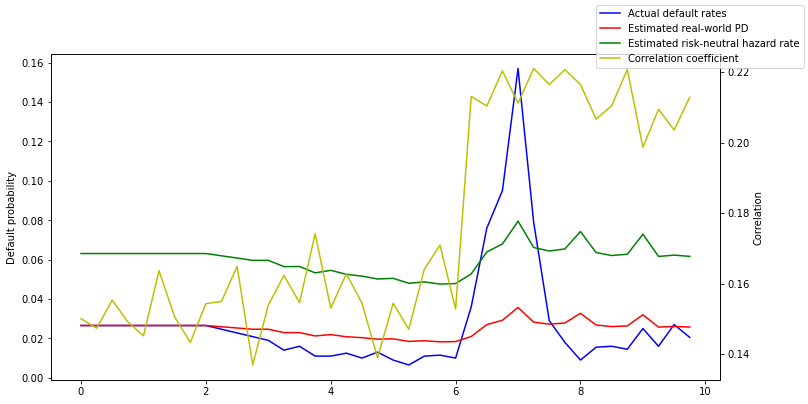

In [814]:
fig, ax = plt.subplots()
ax.plot(np.linspace(0, 9.75, 40), dr_full_m_40, c = 'b', label = 'Actual default rates')
ax.plot(np.linspace(0, 9.75, 40), dr_est_m, c = 'r', label = 'Estimated real-world PD')
ax.plot(np.linspace(0, 9.75, 40), lambda_Q, c = 'g', label = 'Estimated risk-neutral hazard rate')
ax2 = plt.twinx()
ax2.plot(np.linspace(0, 9.75, 40), rhos, c = 'y', label = 'Correlation coefficient')
plt.xlabel('Period')
ax.set_ylabel('Default probability')
ax2.set_ylabel('Correlation')
#plt.legend()
fig.legend()
plt.show()

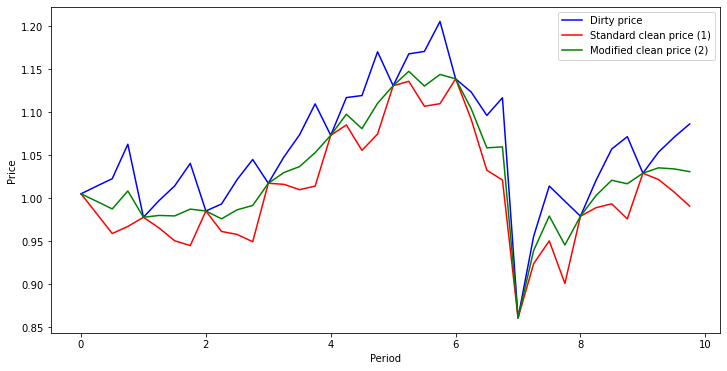

In [815]:
plt.plot(np.linspace(0, 9.75, 40), p_BJ_d_m, c = 'b', label = 'Dirty price')
plt.plot(np.linspace(0, 9.75, 40), p_BJ_c_1_m, c = 'r', label = 'Standard clean price (1)')
plt.plot(np.linspace(0, 9.75, 40), p_BJ_c_2_m, c = 'g', label = 'Modified clean price (2)')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend()
plt.show()

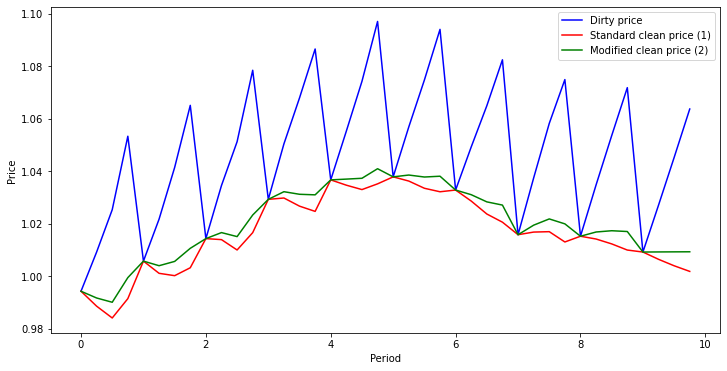

In [816]:
plt.plot(np.linspace(0, 9.75, 40), p_BS_d_m, c = 'b', label = 'Dirty price')
plt.plot(np.linspace(0, 9.75, 40), p_BS_c_1_m, c = 'r', label = 'Standard clean price (1)')
plt.plot(np.linspace(0, 9.75, 40), p_BS_c_2_m, c = 'g', label = 'Modified clean price (2)')
plt.xlabel('Period')
plt.ylabel('Price')
plt.legend()
plt.show()

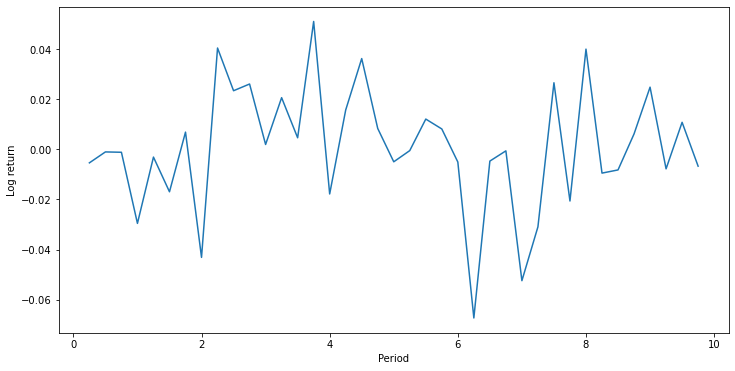

In [515]:
plt.plot(np.linspace(0.25, 9.75, 39), [np.log(p_BJ_c_2_sf[t] / p_BJ_c_2_sf[t - 1]) for t in range(1, 40)])
plt.xlabel('Period')
plt.ylabel('Log return')
plt.show()

In [516]:
returns_BJ_sf = np.array([np.log(p_BJ_c_2_sf[t] / p_BJ_c_2_sf[t - 1]) for t in range(1, 40)])
model_BJ_sf = pf.GARCH(returns_BJ_sf, p = 1, q = 1)
x_BJ_sf = model_BJ_sf.fit()
x_BJ_sf.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 86.6345                           
End Date: 38                                            AIC: -165.269                                     
Number of observations: 38                              BIC: -158.7187                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0005                                                           
q(1)                                 

In [517]:
vol_pred_is_BJ_sf = np.zeros(32)
vol_pred_is_BJ_sf[:31] = np.array(np.sqrt(model_BJ_sf.predict_is(h = 32, fit_once = False))['Series'])[1:]
vol_pred_is_BJ_sf[31] = np.array(np.sqrt(model_BJ_sf.predict(h = 1)))[0]

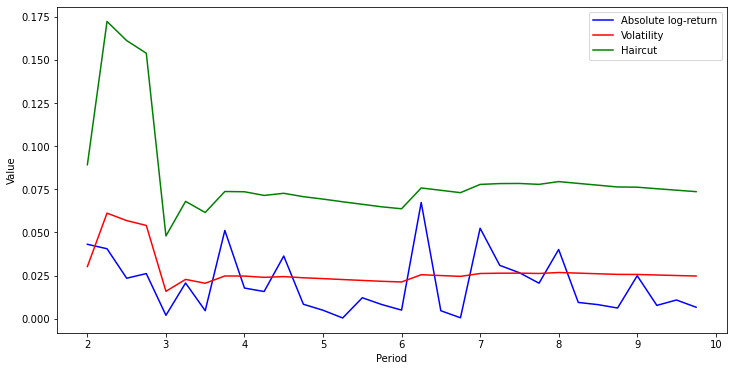

In [518]:
plt.plot(np.linspace(2, 9.75, 32), np.array([np.abs(np.log(p_BJ_c_2_sf[t] / p_BJ_c_2_sf[t - 1])) for t in range(1, 40)])[7:], c = 'b', label = 'Absolute log-return')
plt.plot(np.linspace(2, 9.75, 32), vol_pred_is_BJ_sf, c = 'r', label = 'Volatility')
plt.plot(np.linspace(2, 9.75, 32), 1 - np.exp(- vol_pred_is_BJ_sf * norm.ppf(0.999, 0, 1)), c = 'g', label = 'Haircut')
plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()

In [519]:
returns_BS_sf = np.array([np.log(p_BS_c_2_sf[t] / p_BS_c_2_sf[t - 1]) for t in range(1, 40)])
model_BS_sf = pf.GARCH(returns_BS_sf, p = 1, q = 1)
x_BS_sf = model_BS_sf.fit()
x_BS_sf.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 132.876                           
End Date: 38                                            AIC: -257.7521                                    
Number of observations: 38                              BIC: -251.2017                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

In [520]:
vol_pred_is_BS_sf = np.zeros(32)
vol_pred_is_BS_sf[:31] = np.array(np.sqrt(model_BS_sf.predict_is(h = 32, fit_once = False))['Series'])[1:]
vol_pred_is_BS_sf[31] = np.array(np.sqrt(model_BS_sf.predict(h = 1)))[0]

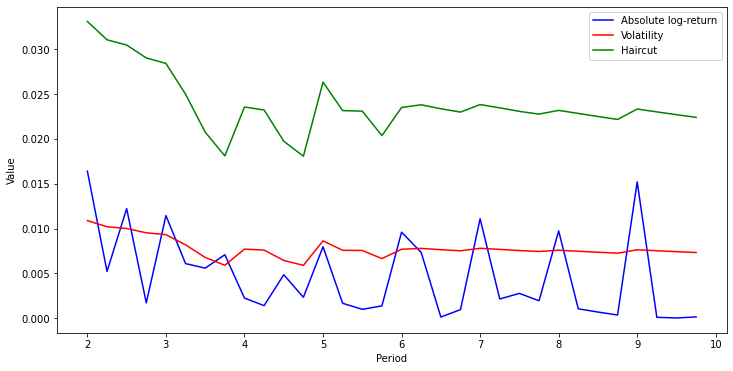

In [521]:
plt.plot(np.linspace(2, 9.75, 32), np.array([np.abs(np.log(p_BS_c_2_sf[t] / p_BS_c_2_sf[t - 1])) for t in range(1, 40)])[7:], c = 'b', label = 'Absolute log-return')
plt.plot(np.linspace(2, 9.75, 32), vol_pred_is_BS_sf, c = 'r', label = 'Volatility')
plt.plot(np.linspace(2, 9.75, 32), 1 - np.exp(- vol_pred_is_BS_sf * norm.ppf(0.999, 0, 1)), c = 'g', label = 'Haircut')
plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()

In [818]:
returns_BJ_m = np.array([np.log(p_BJ_c_2_m[t] / p_BJ_c_2_m[t - 1]) for t in range(1, 40)])
model_BJ_m = pf.GARCH(returns_BJ_m, p = 1, q = 1)
x_BJ_m = model_BJ_m.fit()
x_BJ_m.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 75.5911                           
End Date: 38                                            AIC: -143.1823                                    
Number of observations: 38                              BIC: -136.6319                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0001                                                           
q(1)                                 

In [819]:
vol_pred_is_BJ_m = np.zeros(32)
vol_pred_is_BJ_m[:31] = np.array(np.sqrt(model_BJ_m.predict_is(h = 32, fit_once = False))['Series'])[1:]
vol_pred_is_BJ_m[31] = np.array(np.sqrt(model_BJ_m.predict(h = 1)))[0]

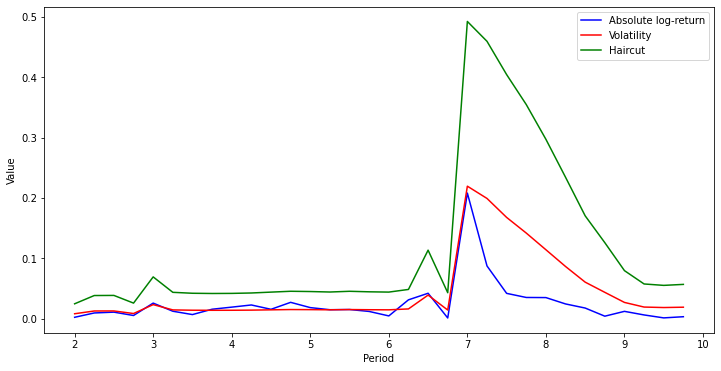

In [820]:
plt.plot(np.linspace(2, 9.75, 32), np.array([np.abs(np.log(p_BJ_c_2_m[t] / p_BJ_c_2_m[t - 1])) for t in range(1, 40)])[7:], c = 'b', label = 'Absolute log-return')
plt.plot(np.linspace(2, 9.75, 32), vol_pred_is_BJ_m, c = 'r', label = 'Volatility')
plt.plot(np.linspace(2, 9.75, 32), 1 - np.exp(- vol_pred_is_BJ_m * norm.ppf(0.999, 0, 1)), c = 'g', label = 'Haircut')
plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()

In [821]:
returns_BS_m = np.array([np.log(p_BS_c_2_m[t] / p_BS_c_2_m[t - 1]) for t in range(1, 40)])
model_BS_m = pf.GARCH(returns_BS_m, p = 1, q = 1)
x_BS_m = model_BS_m.fit()
x_BS_m.summary()

GARCH(1,1)                                                                                                
======================================================= ==================================================
Dependent Variable: Series                              Method: MLE                                       
Start Date: 1                                           Log Likelihood: 156.1608                          
End Date: 38                                            AIC: -304.3215                                    
Number of observations: 38                              BIC: -297.7712                                    
Latent Variable                          Estimate   Std Error  z        P>|z|    95% C.I.                 
======================================== ========== ========== ======== ======== =========================
Vol Constant                             0.0                                                              
q(1)                                 

In [822]:
vol_pred_is_BS_m = np.zeros(32)
vol_pred_is_BS_m[:31] = np.array(np.sqrt(model_BS_m.predict_is(h = 32, fit_once = False))['Series'])[1:]
vol_pred_is_BS_m[31] = np.array(np.sqrt(model_BS_m.predict(h = 1)))[0]

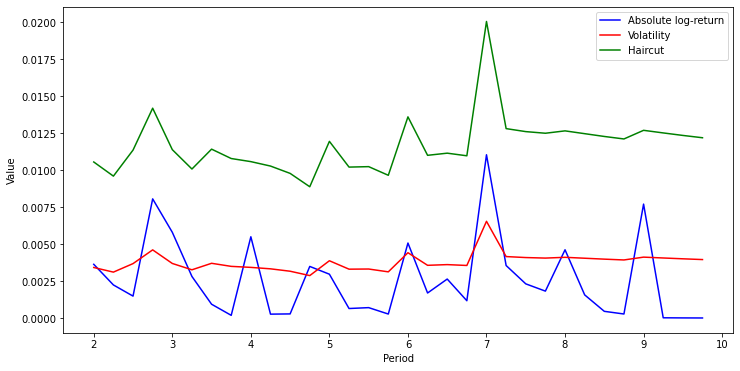

In [823]:
plt.plot(np.linspace(2, 9.75, 32), np.array([np.abs(np.log(p_BS_c_2_m[t] / p_BS_c_2_m[t - 1])) for t in range(1, 40)])[7:], c = 'b', label = 'Absolute log-return')
plt.plot(np.linspace(2, 9.75, 32), vol_pred_is_BS_m, c = 'r', label = 'Volatility')
plt.plot(np.linspace(2, 9.75, 32), 1 - np.exp(- vol_pred_is_BS_m * norm.ppf(0.999, 0, 1)), c = 'g', label = 'Haircut')
plt.xlabel('Period')
plt.ylabel('Value')
plt.legend()
plt.show()

In [824]:
h_BJ_sf = 1 - np.exp(- vol_pred_is_BJ_sf * norm.ppf(0.999, 0, 1))
h_BS_sf = 1 - np.exp(- vol_pred_is_BS_sf * norm.ppf(0.999, 0, 1))
h_BJ_m = 1 - np.exp(- vol_pred_is_BJ_m * norm.ppf(0.999, 0, 1))
h_BS_m = 1 - np.exp(- vol_pred_is_BS_m * norm.ppf(0.999, 0, 1))

In [825]:
t_TSLGC_BJ_sf = p_BJ_d_sf[8:] * (1 - h_BJ_sf)
t_TSLGC_BS_sf = p_BS_d_sf[8:] * (1 - h_BS_sf)
t_TSLGC_BJ_m = p_BJ_d_m[8:] * (1 - h_BJ_m)
t_TSLGC_BS_m = p_BS_d_m[8:] * (1 - h_BS_m)

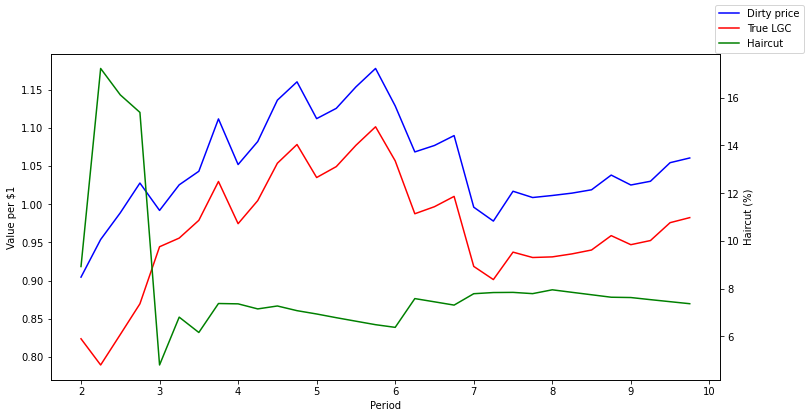

In [826]:
fig, ax = plt.subplots()
ax.plot(np.linspace(2, 9.75, 32), p_BJ_d_sf[8:], c = 'b', label = 'Dirty price')
ax.plot(np.linspace(2, 9.75, 32), t_TSLGC_BJ_sf, c = 'r', label = 'True LGC')
ax2 = plt.twinx()
ax2.plot(np.linspace(2, 9.75, 32), h_BJ_sf * 100, c = 'g', label = 'Haircut')
ax.set_xlabel('Period')
ax.set_ylabel('Value per $1')
ax2.set_ylabel('Haircut (%)')
#plt.legend()
fig.legend()
plt.show()

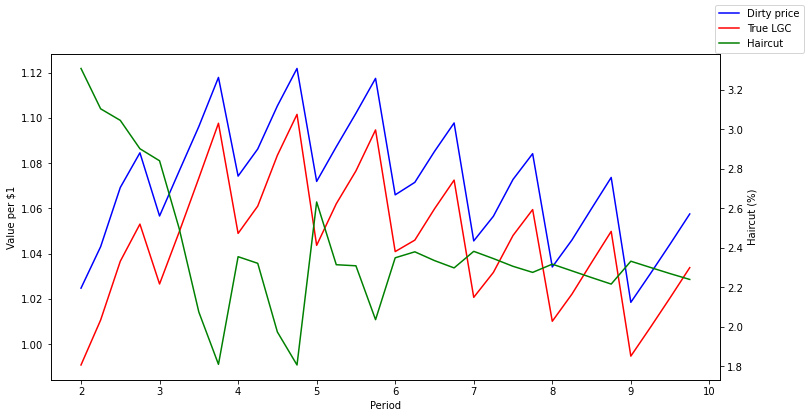

In [525]:
fig, ax = plt.subplots()
ax.plot(np.linspace(2, 9.75, 32), p_BS_d_sf[8:], c = 'b', label = 'Dirty price')
ax.plot(np.linspace(2, 9.75, 32), t_TSLGC_BS_sf, c = 'r', label = 'True LGC')
ax2 = plt.twinx()
ax2.plot(np.linspace(2, 9.75, 32), h_BS_sf * 100, c = 'g', label = 'Haircut')
ax.set_xlabel('Period')
ax.set_ylabel('Value per $1')
ax2.set_ylabel('Haircut (%)')
#plt.legend()
fig.legend()
plt.show()

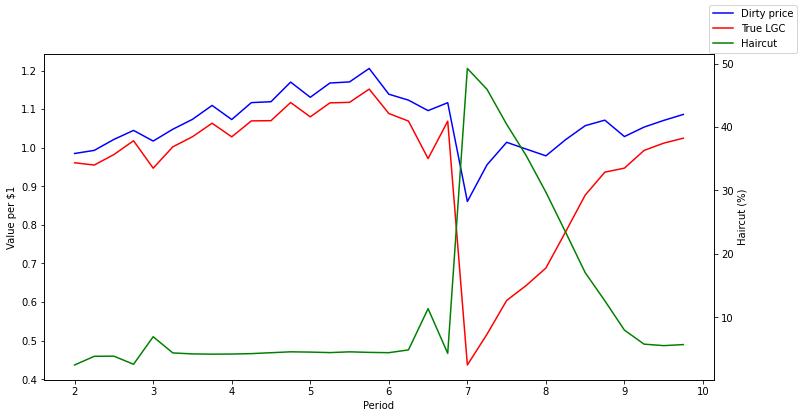

In [827]:
fig, ax = plt.subplots()
ax.plot(np.linspace(2, 9.75, 32), p_BJ_d_m[8:], c = 'b', label = 'Dirty price')
ax.plot(np.linspace(2, 9.75, 32), t_TSLGC_BJ_m, c = 'r', label = 'True LGC')
ax2 = plt.twinx()
ax2.plot(np.linspace(2, 9.75, 32), h_BJ_m * 100, c = 'g', label = 'Haircut')
ax.set_xlabel('Period')
ax.set_ylabel('Value per $1')
ax2.set_ylabel('Haircut (%)')
#plt.legend()
fig.legend()
plt.show()

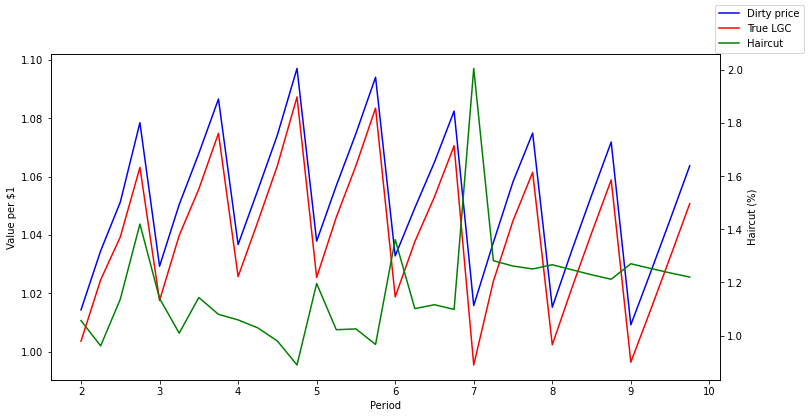

In [828]:
fig, ax = plt.subplots()
ax.plot(np.linspace(2, 9.75, 32), p_BS_d_m[8:], c = 'b', label = 'Dirty price')
ax.plot(np.linspace(2, 9.75, 32), t_TSLGC_BS_m, c = 'r', label = 'True LGC')
ax2 = plt.twinx()
ax2.plot(np.linspace(2, 9.75, 32), h_BS_m * 100, c = 'g', label = 'Haircut')
ax.set_xlabel('Period')
ax.set_ylabel('Value per $1')
ax2.set_ylabel('Haircut (%)')
#plt.legend()
fig.legend()
plt.show()

In [526]:
RPaR_t_1_BJ_sf = np.array([p_BJ_d_sf[t + 8] * np.exp(- vol_pred_is_BJ_sf[t] * np.sqrt(4) * norm.ppf(0.95, 0, 1)) * (1 - h_BJ_sf[t]) for t in range(28)])
RPaR_t_2_BJ_sf = np.array([p_BJ_d_sf[t + 8] * np.exp(- vol_pred_is_BJ_sf[t] * np.sqrt(8) * norm.ppf(0.95, 0, 1)) * (1 - h_BJ_sf[t]) for t in range(24)])

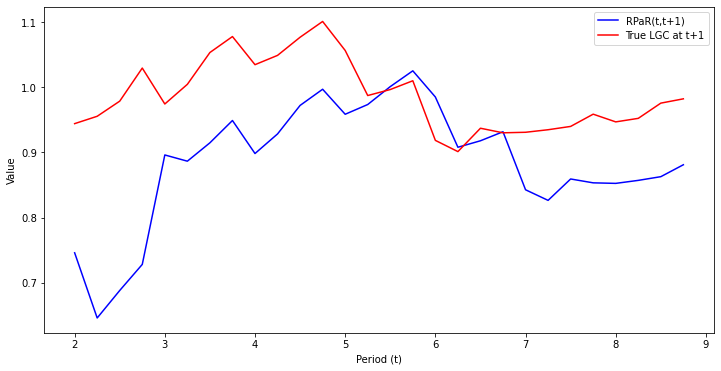

In [527]:
plt.plot(np.linspace(2, 8.75, 28), RPaR_t_1_BJ_sf, c = 'b', label = 'RPaR(t,t+1)')
plt.plot(np.linspace(2, 8.75, 28), t_TSLGC_BJ_sf[4:], c = 'r', label = 'True LGC at t+1')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

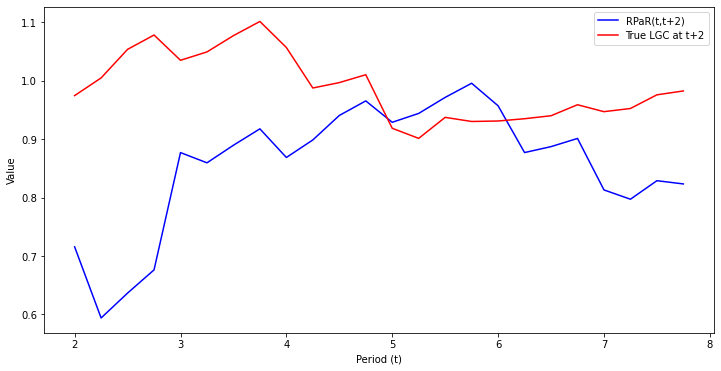

In [528]:
plt.plot(np.linspace(2, 7.75, 24), RPaR_t_2_BJ_sf, c = 'b', label = 'RPaR(t,t+2)')
plt.plot(np.linspace(2, 7.75, 24), t_TSLGC_BJ_sf[8:], c = 'r', label = 'True LGC at t+2')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [529]:
TSLGCaRs_BJ_sf = []

for t in range(2, 10):
    TSLGCaR = np.array([p_BJ_d_sf[t * 4] * np.exp(- vol_pred_is_BJ_sf[(t - 2) * 4] * np.sqrt(i) * norm.ppf(0.95, 0, 1)) * (1 - h_BJ_sf[(t - 2) * 4]) for i in range(1, (10 - t) * 4)])
    TSLGCaRs_BJ_sf.append(TSLGCaR)

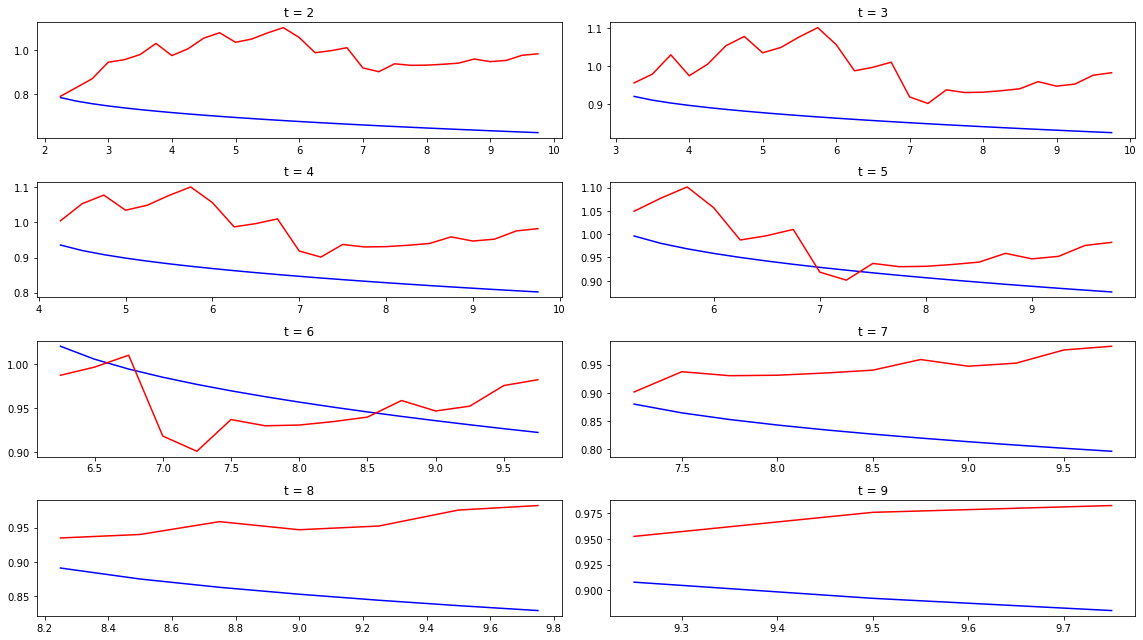

In [530]:
f, axs = plt.subplots(4, 2, figsize = (16,9))

for i in range(8):
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), TSLGCaRs_BJ_sf[i], c = 'b')
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), t_TSLGC_BJ_sf[(i * 4 + 1):], c = 'r')
    axs[i // 2, i % 2].set_title('t = ' + str(i + 2))

plt.tight_layout()
plt.show()

In [531]:
RPaR_t_1_BS_sf = np.array([p_BS_d_sf[t + 8] * np.exp(- vol_pred_is_BS_sf[t] * np.sqrt(4) * norm.ppf(0.95, 0, 1)) * (1 - h_BS_sf[t]) for t in range(28)])
RPaR_t_2_BS_sf = np.array([p_BS_d_sf[t + 8] * np.exp(- vol_pred_is_BS_sf[t] * np.sqrt(8) * norm.ppf(0.95, 0, 1)) * (1 - h_BS_sf[t]) for t in range(24)])

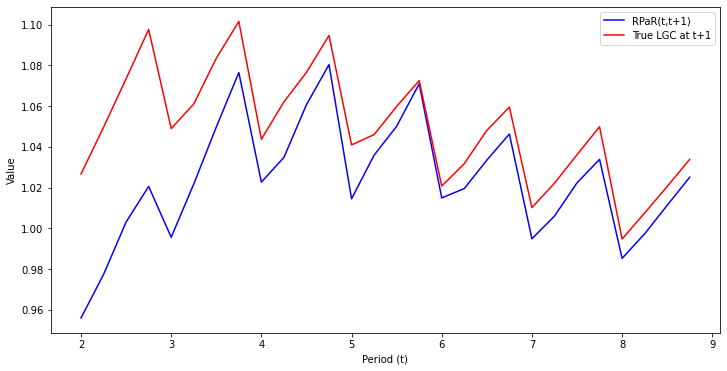

In [532]:
plt.plot(np.linspace(2, 8.75, 28), RPaR_t_1_BS_sf, c = 'b', label = 'RPaR(t,t+1)')
plt.plot(np.linspace(2, 8.75, 28), t_TSLGC_BS_sf[4:], c = 'r', label = 'True LGC at t+1')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

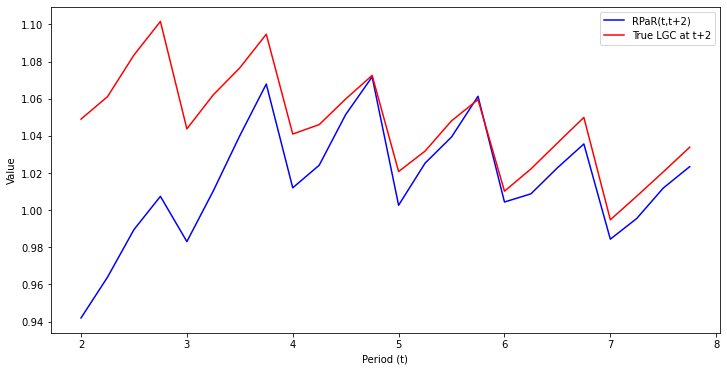

In [533]:
plt.plot(np.linspace(2, 7.75, 24), RPaR_t_2_BS_sf, c = 'b', label = 'RPaR(t,t+2)')
plt.plot(np.linspace(2, 7.75, 24), t_TSLGC_BS_sf[8:], c = 'r', label = 'True LGC at t+2')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [534]:
TSLGCaRs_BS_sf = []

for t in range(2, 10):
    TSLGCaR = np.array([p_BS_d_sf[t * 4] * np.exp(- vol_pred_is_BS_sf[(t - 2) * 4] * np.sqrt(i) * norm.ppf(0.95, 0, 1)) * (1 - h_BS_sf[(t - 2) * 4]) for i in range(1, (10 - t) * 4)])
    TSLGCaRs_BS_sf.append(TSLGCaR)

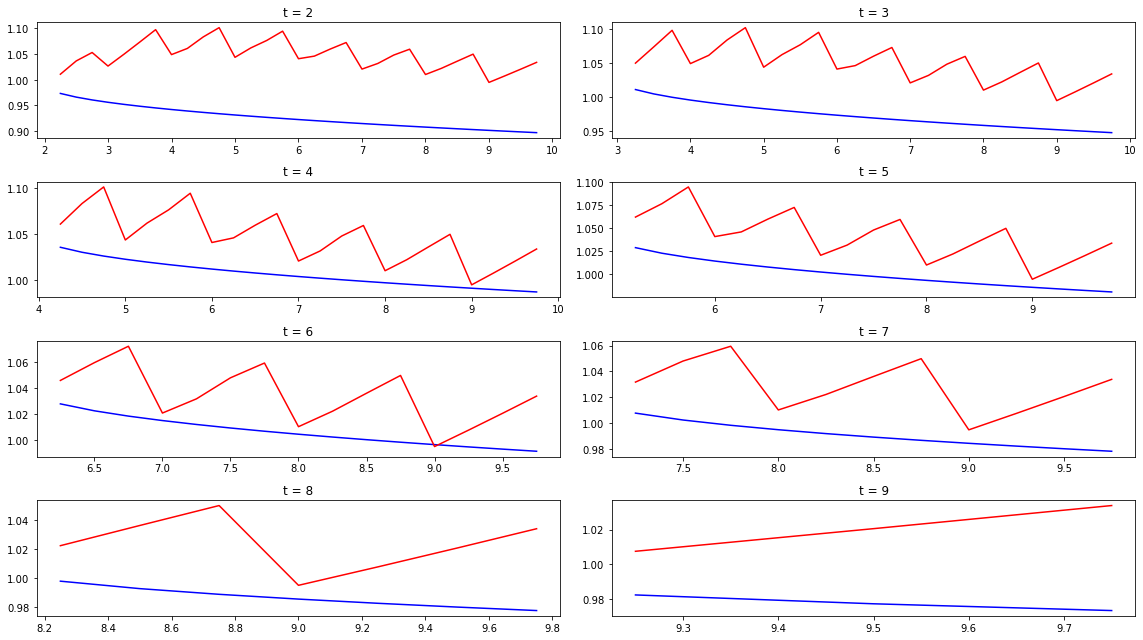

In [535]:
f, axs = plt.subplots(4, 2, figsize = (16,9))

for i in range(8):
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), TSLGCaRs_BS_sf[i], c = 'b')
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), t_TSLGC_BS_sf[(i * 4 + 1):], c = 'r')
    axs[i // 2, i % 2].set_title('t = ' + str(i + 2))

plt.tight_layout()
plt.show()

In [829]:
RPaR_t_1_BJ_m = np.array([p_BJ_d_m[t + 8] * np.exp(- vol_pred_is_BJ_m[t] * np.sqrt(4) * norm.ppf(0.99, 0, 1)) * (1 - h_BJ_m[t]) for t in range(28)])
RPaR_t_2_BJ_m = np.array([p_BJ_d_m[t + 8] * np.exp(- vol_pred_is_BJ_m[t] * np.sqrt(8) * norm.ppf(0.99, 0, 1)) * (1 - h_BJ_m[t]) for t in range(24)])

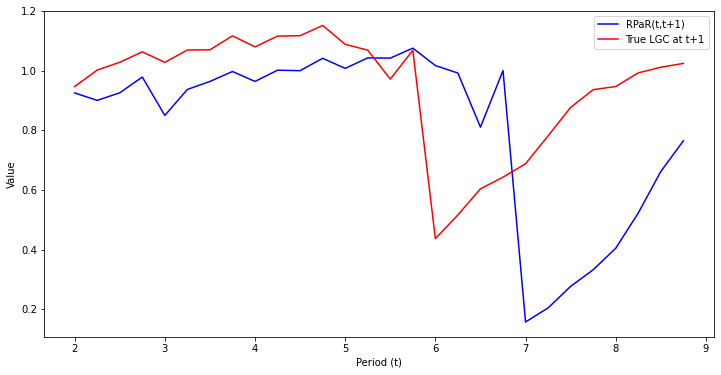

In [830]:
plt.plot(np.linspace(2, 8.75, 28), RPaR_t_1_BJ_m, c = 'b', label = 'RPaR(t,t+1)')
plt.plot(np.linspace(2, 8.75, 28), t_TSLGC_BJ_m[4:], c = 'r', label = 'True LGC at t+1')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

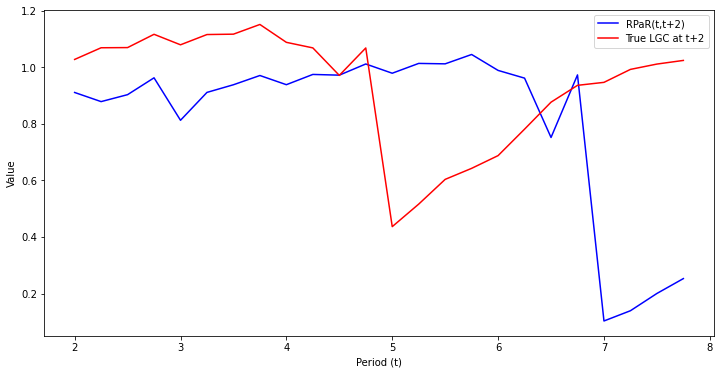

In [831]:
plt.plot(np.linspace(2, 7.75, 24), RPaR_t_2_BJ_m, c = 'b', label = 'RPaR(t,t+2)')
plt.plot(np.linspace(2, 7.75, 24), t_TSLGC_BJ_m[8:], c = 'r', label = 'True LGC at t+2')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [832]:
TSLGCaRs_BJ_m = []

for t in range(2, 10):
    TSLGCaR = np.array([p_BJ_d_m[t * 4] * np.exp(- vol_pred_is_BJ_m[(t - 2) * 4] * np.sqrt(i) * norm.ppf(0.99, 0, 1)) * (1 - h_BJ_m[(t - 2) * 4]) for i in range(1, (10 - t) * 4)])
    TSLGCaRs_BJ_m.append(TSLGCaR)

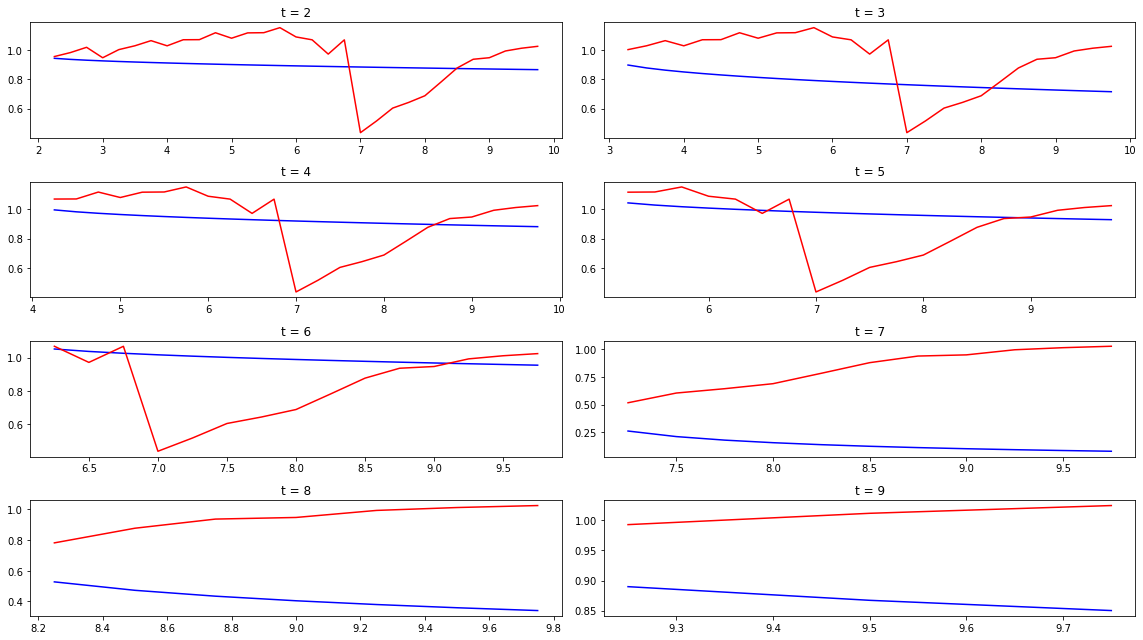

In [833]:
f, axs = plt.subplots(4, 2, figsize = (16,9))

for i in range(8):
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), TSLGCaRs_BJ_m[i], c = 'b')
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), t_TSLGC_BJ_m[(i * 4 + 1):], c = 'r')
    axs[i // 2, i % 2].set_title('t = ' + str(i + 2))

plt.tight_layout()
plt.show()

In [834]:
RPaR_t_1_BS_m = np.array([p_BS_d_m[t + 8] * np.exp(- vol_pred_is_BS_m[t] * np.sqrt(4) * norm.ppf(0.99, 0, 1)) * (1 - h_BS_m[t]) for t in range(28)])
RPaR_t_2_BS_m = np.array([p_BS_d_m[t + 8] * np.exp(- vol_pred_is_BS_m[t] * np.sqrt(8) * norm.ppf(0.99, 0, 1)) * (1 - h_BS_m[t]) for t in range(24)])

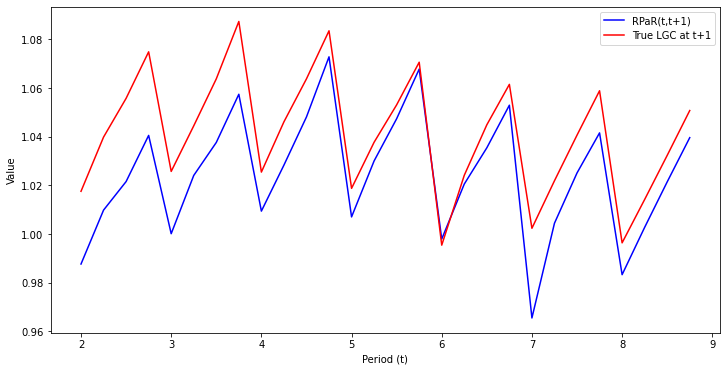

In [835]:
plt.plot(np.linspace(2, 8.75, 28), RPaR_t_1_BS_m, c = 'b', label = 'RPaR(t,t+1)')
plt.plot(np.linspace(2, 8.75, 28), t_TSLGC_BS_m[4:], c = 'r', label = 'True LGC at t+1')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

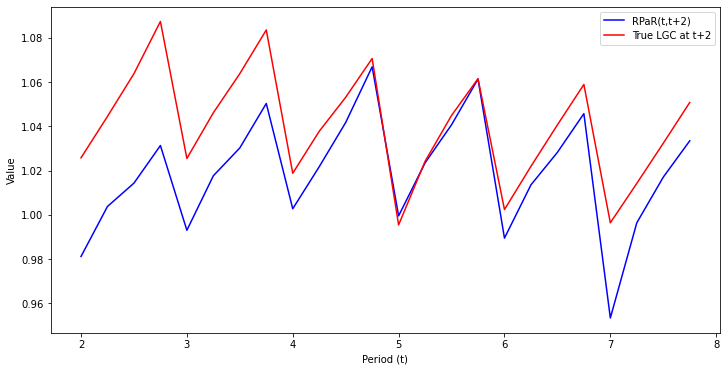

In [836]:
plt.plot(np.linspace(2, 7.75, 24), RPaR_t_2_BS_m, c = 'b', label = 'RPaR(t,t+2)')
plt.plot(np.linspace(2, 7.75, 24), t_TSLGC_BS_m[8:], c = 'r', label = 'True LGC at t+2')
plt.xlabel('Period (t)')
plt.ylabel('Value')
plt.legend()
plt.show()

In [837]:
TSLGCaRs_BS_m = []

for t in range(2, 10):
    TSLGCaR = np.array([p_BS_d_m[t * 4] * np.exp(- vol_pred_is_BS_m[(t - 2) * 4] * np.sqrt(i) * norm.ppf(0.99, 0, 1)) * (1 - h_BS_m[(t - 2) * 4]) for i in range(1, (10 - t) * 4)])
    TSLGCaRs_BS_m.append(TSLGCaR)

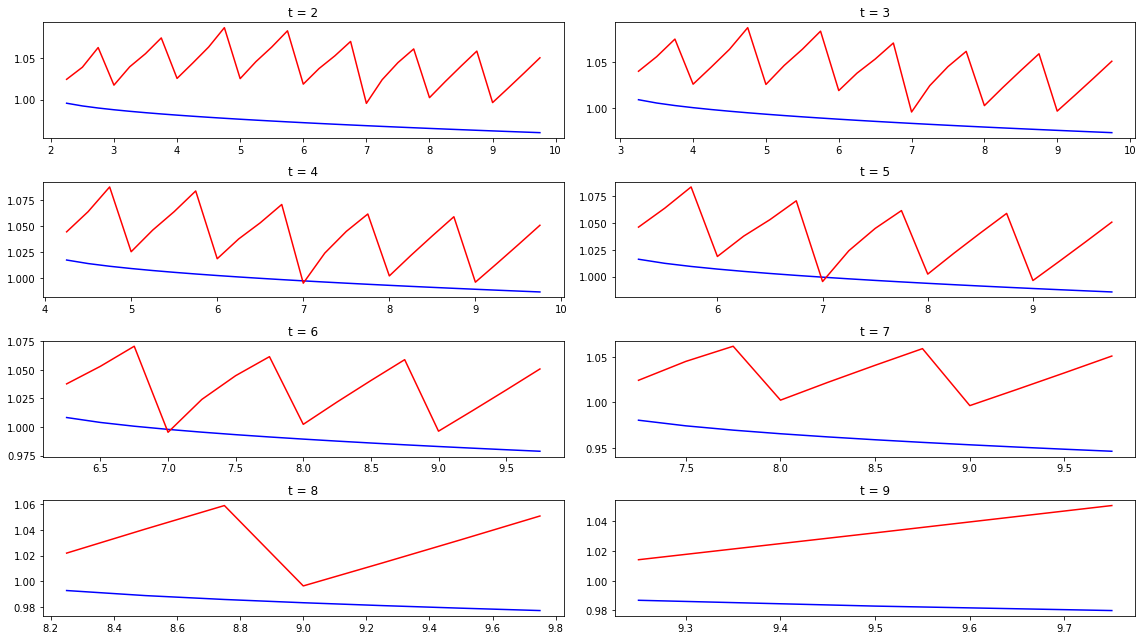

In [838]:
f, axs = plt.subplots(4, 2, figsize = (16,9))

for i in range(8):
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), TSLGCaRs_BS_m[i], c = 'b')
    axs[i // 2, i % 2].plot(np.linspace(i + 2.25, 9.75, (10 - (i + 2)) * 4 - 1), t_TSLGC_BS_m[(i * 4 + 1):], c = 'r')
    axs[i // 2, i % 2].set_title('t = ' + str(i + 2))

plt.tight_layout()
plt.show()